# Insurance Fraude Detection

### Importing useful libraries

In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import lightgbm as lgm
import xgboost as xgb
from sklearn.model_selection import train_test_split

sns.set(style='whitegrid')

### Importing data

In [2]:
train = pd.read_csv("insurance_fraud_train.csv", engine="python", index_col=0)

##  Exploratory Data Analysis (EDA)

In [3]:
train.head()

,IncidentMonth,IncidentWeekOfMonth,IncidentDayOfWeek,Make,IncidentAddressType,DeclarationDayOfWeek,DeclarationMonth,DeclarationWeekOfMonth,DriverGender,DriverMaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChangeClaim,NumberOfCars,IncidentYear,BasePolicy
1,Sep,4,Monday,Mazda,Urban,Tuesday,Oct,2,Male,Married,...,more than 7,over 65,No,No,External,none,no change,1 vehicle,1994,All Perils
2,Mar,3,Friday,Chevrolet,Rural,Wednesday,Mar,4,Male,Married,...,more than 7,over 65,No,No,External,more than 5,no change,1 vehicle,1994,All Perils
3,Jan,3,Monday,Pontiac,Urban,Tuesday,Jan,3,Male,Married,...,more than 7,51 to 65,No,No,External,none,no change,1 vehicle,1996,All Perils
4,Jun,4,Monday,Mazda,Urban,Wednesday,Jun,5,Male,Married,...,more than 7,41 to 50,No,No,External,1 to 2,no change,1 vehicle,1996,Liability
5,Jul,4,Saturday,Honda,Urban,Thursday,Aug,2,Male,Married,...,more than 7,36 to 40,No,No,External,none,no change,1 vehicle,1994,Collision


In [4]:
frauds = train[train['FraudFound']==1]
frauds.head()

,IncidentMonth,IncidentWeekOfMonth,IncidentDayOfWeek,Make,IncidentAddressType,DeclarationDayOfWeek,DeclarationMonth,DeclarationWeekOfMonth,DriverGender,DriverMaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChangeClaim,NumberOfCars,IncidentYear,BasePolicy
31,Jan,2,Monday,Chevrolet,Urban,Wednesday,Jan,3,Male,Married,...,7 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
32,Aug,2,Wednesday,Toyota,Urban,Thursday,Aug,3,Male,Married,...,7 years,36 to 40,No,No,External,1 to 2,no change,1 vehicle,1994,All Perils
58,Nov,2,Thursday,Toyota,Rural,Friday,Nov,2,Male,Married,...,4 years,41 to 50,No,No,External,none,no change,1 vehicle,1995,Collision
86,Apr,2,Wednesday,Mazda,Urban,Thursday,Apr,3,Male,Married,...,7 years,36 to 40,No,No,External,none,no change,1 vehicle,1996,All Perils
115,Jun,4,Wednesday,Toyota,Urban,Monday,Jun,4,Female,Married,...,7 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1994,Collision


In [5]:
Fraud = train[['FraudFound']]
Fraud['Count'] = 1
FraudCount = Fraud.groupby(Fraud.FraudFound).sum()
FraudCount = FraudCount.drop(columns=['FraudFound'])
FraudCount

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Count
FraudFound,
0,10898
1,667


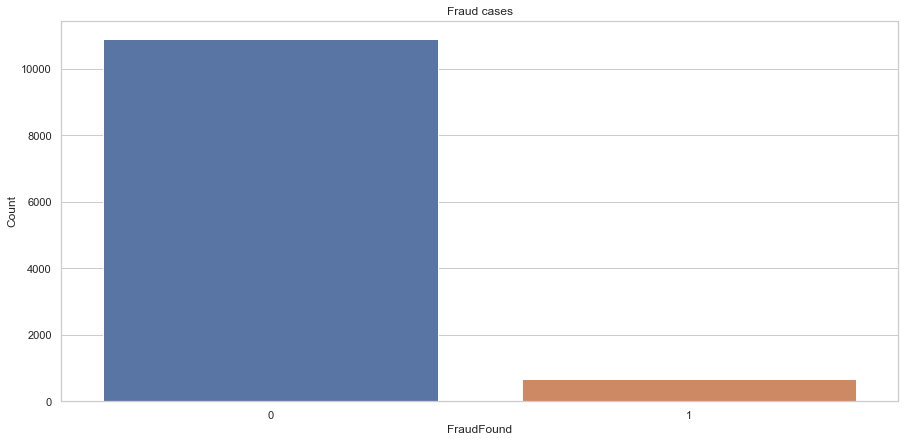

In [6]:
plt.figure(figsize=(15, 7))
sns.barplot(FraudCount.index, FraudCount.Count);
plt.title('Fraud cases');

The dataset is imbalanced since our target variable 'FraudFound' shows 667 cases of fraud confirmed vs 10898 of normal cases. We will investigate some feauture behaviours for general cases and compare them to fraud cases in order to spot if there is a change of behaviour and get a primary idea about fraud circumstances.

**Incident month**

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


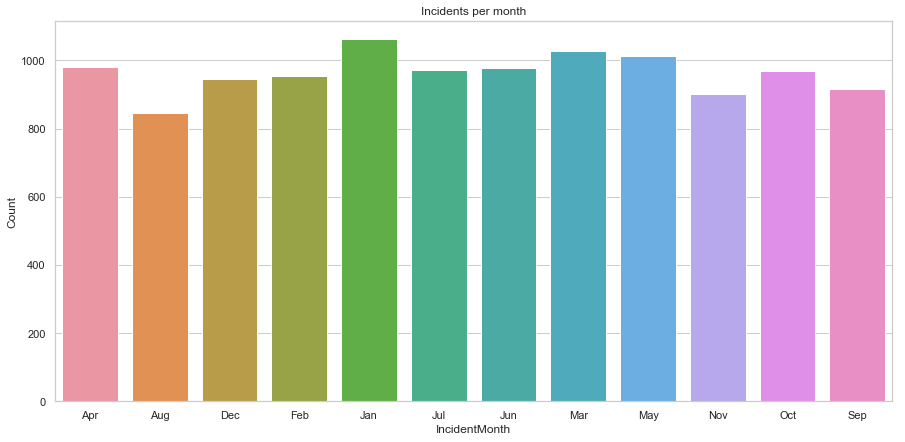

In [7]:
sns.set(style='whitegrid')
x = train[['IncidentMonth']]
x['Count'] = 1
xCount = x.groupby(x.IncidentMonth).sum()

plt.figure(figsize=(15, 7))
sns.barplot(xCount.index, xCount.Count);
plt.title('Incidents per month');

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


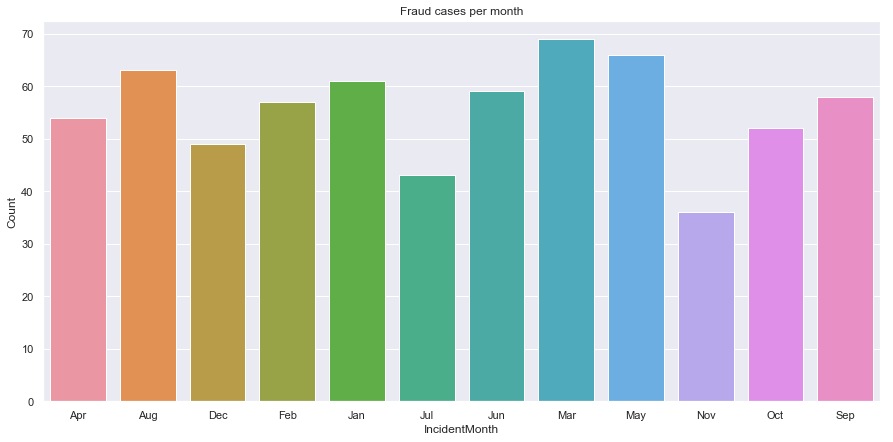

In [8]:
sns.set(style='darkgrid')
x = frauds[['IncidentMonth']]
x['Count'] = 1
xCount = x.groupby(x.IncidentMonth).sum()

plt.figure(figsize=(15, 7))
sns.barplot(xCount.index, xCount.Count);
plt.title('Fraud cases per month');

**Incident Week Of Month**

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


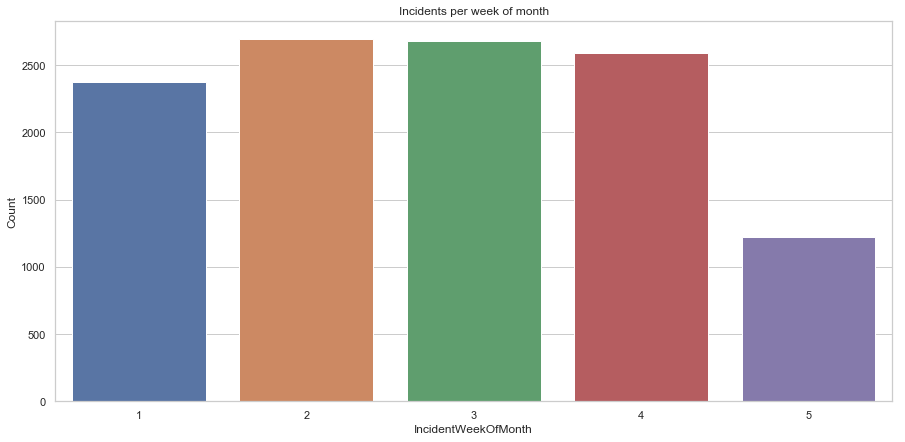

In [9]:
sns.set(style='whitegrid')
x = train[['IncidentWeekOfMonth']]
x['Count'] = 1
xCount = x.groupby(x.IncidentWeekOfMonth).sum()

plt.figure(figsize=(15, 7))
sns.barplot(xCount.index, xCount.Count);
plt.title('Incidents per week of month');

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


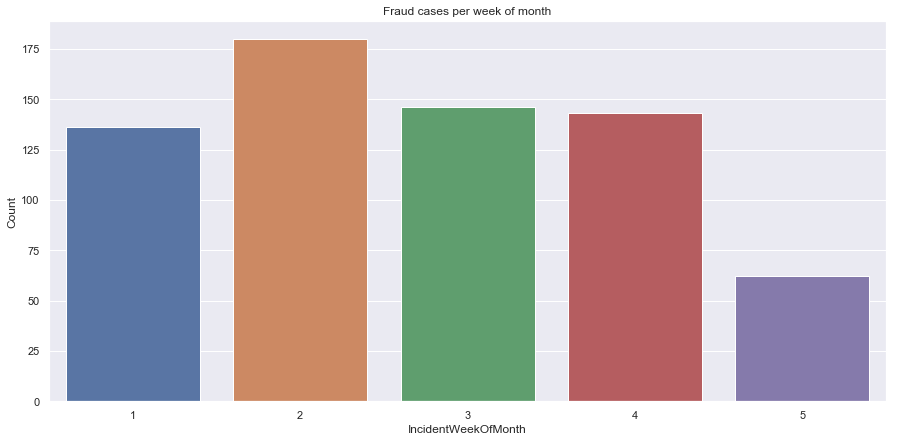

In [10]:
sns.set(style='darkgrid')
x = frauds[['IncidentWeekOfMonth']]
x['Count'] = 1
xCount = x.groupby(x.IncidentWeekOfMonth).sum()

plt.figure(figsize=(15, 7))
sns.barplot(xCount.index, xCount.Count);
plt.title('Fraud cases per week of month');

**IncidentDayOfWeek**

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


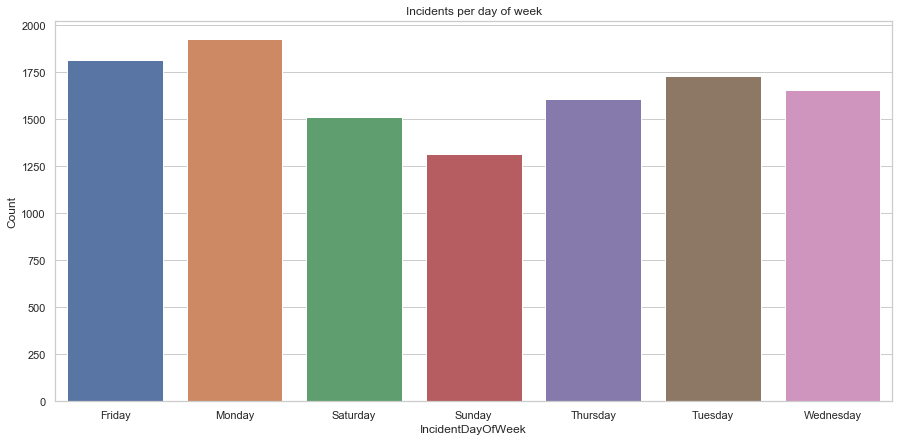

In [11]:
sns.set(style='whitegrid')
x = train[['IncidentDayOfWeek']]
x['Count'] = 1
xCount = x.groupby(x.IncidentDayOfWeek).sum()

plt.figure(figsize=(15, 7))
sns.barplot(xCount.index, xCount.Count);
plt.title('Incidents per day of week');

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


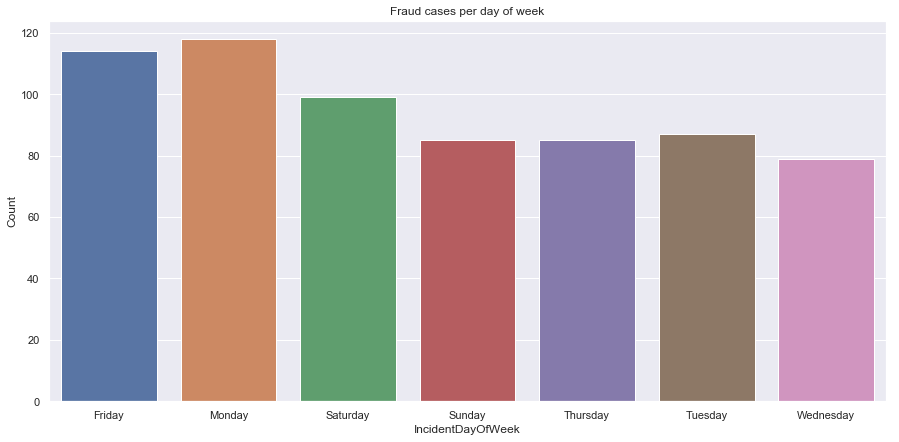

In [12]:
sns.set(style='darkgrid')
x = frauds[['IncidentDayOfWeek']]
x['Count'] = 1
xCount = x.groupby(x.IncidentDayOfWeek).sum()

plt.figure(figsize=(15, 7))
sns.barplot(xCount.index, xCount.Count);
plt.title('Fraud cases per day of week');

**IncidentAddressType**

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


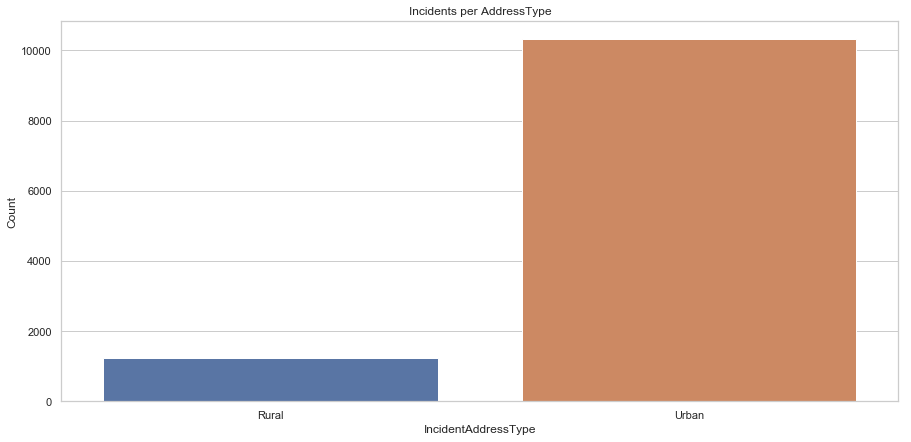

In [13]:
sns.set(style='whitegrid')
x = train[['IncidentAddressType']]
x['Count'] = 1
xCount = x.groupby(x.IncidentAddressType).sum()

plt.figure(figsize=(15, 7))
sns.barplot(xCount.index, xCount.Count);
plt.title('Incidents per AddressType');

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


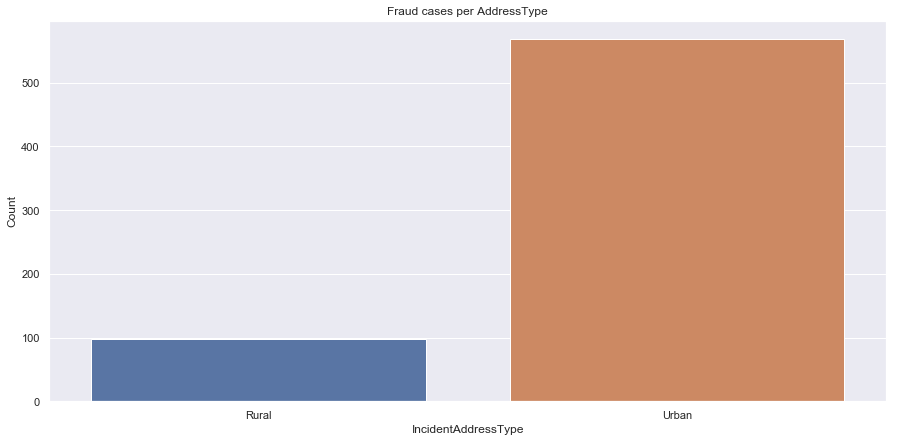

In [14]:
sns.set(style='darkgrid')
x = frauds[['IncidentAddressType']]
x['Count'] = 1
xCount = x.groupby(x.IncidentAddressType).sum()

plt.figure(figsize=(15, 7))
sns.barplot(xCount.index, xCount.Count);
plt.title('Fraud cases per AddressType');

**DeclarationDayOfWeek**

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


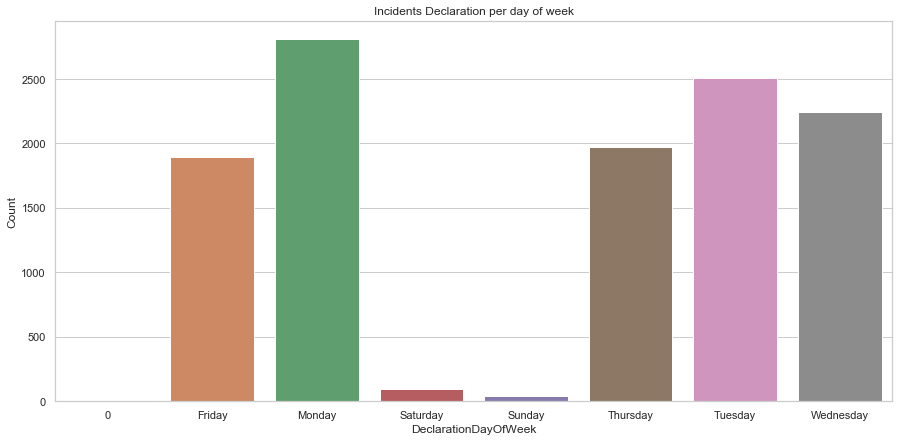

In [15]:
sns.set(style='whitegrid')
x = train[['DeclarationDayOfWeek']]
x['Count'] = 1
xCount = x.groupby(x.DeclarationDayOfWeek).sum()

plt.figure(figsize=(15, 7))
sns.barplot(xCount.index, xCount.Count);
plt.title('Incidents Declaration per day of week');

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


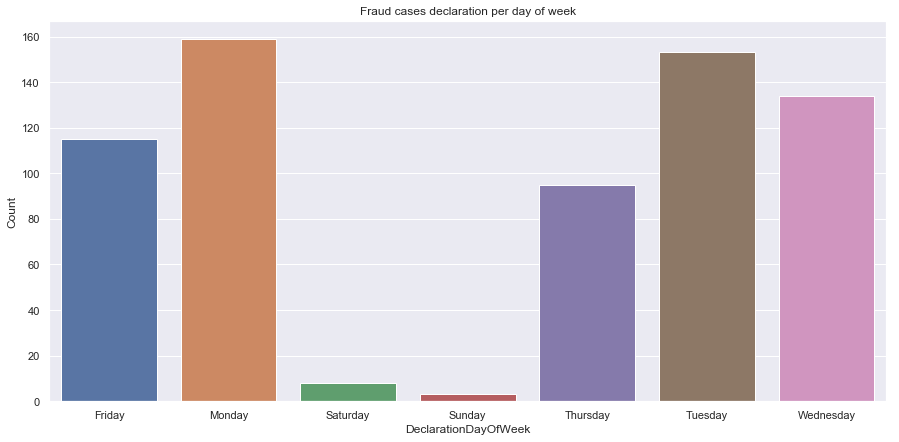

In [16]:
sns.set(style='darkgrid')
x = frauds[['DeclarationDayOfWeek']]
x['Count'] = 1
xCount = x.groupby(x.DeclarationDayOfWeek).sum()

plt.figure(figsize=(15, 7))
sns.barplot(xCount.index, xCount.Count);
plt.title('Fraud cases declaration per day of week');

**DeclarationMonth**

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


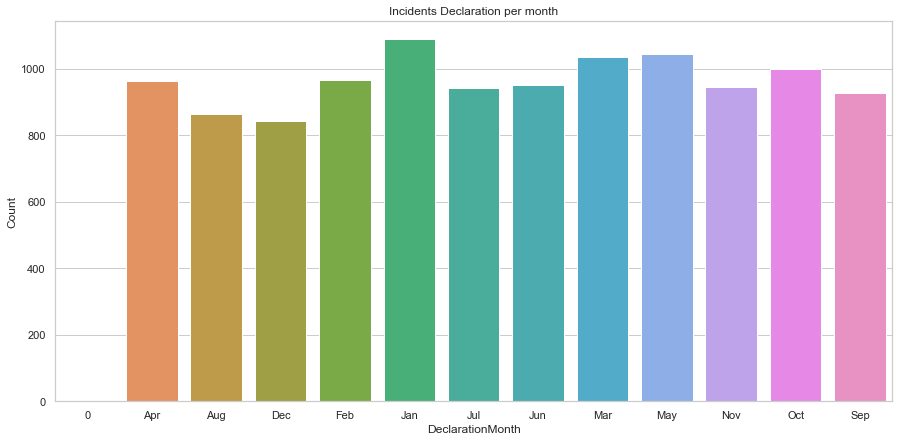

In [17]:
sns.set(style='whitegrid')
x = train[['DeclarationMonth']]
x['Count'] = 1
xCount = x.groupby(x.DeclarationMonth).sum()

plt.figure(figsize=(15, 7))
sns.barplot(xCount.index, xCount.Count);
plt.title('Incidents Declaration per month');

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


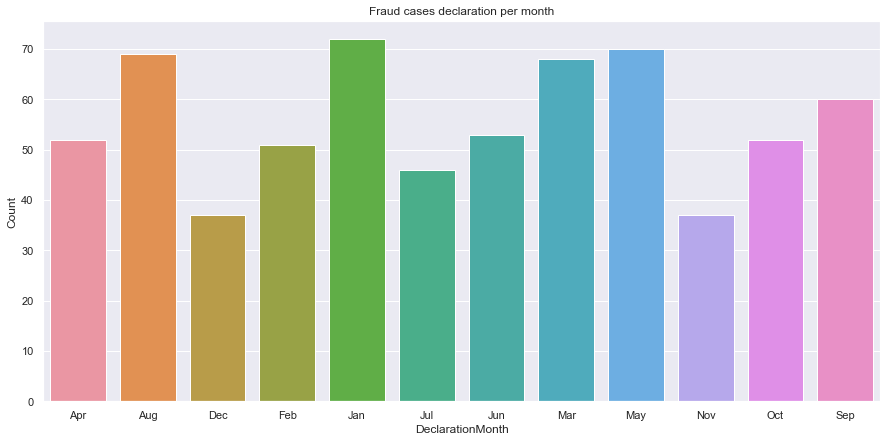

In [18]:
sns.set(style='darkgrid')
x = frauds[['DeclarationMonth']]
x['Count'] = 1
xCount = x.groupby(x.DeclarationMonth).sum()

plt.figure(figsize=(15, 7))
sns.barplot(xCount.index, xCount.Count);
plt.title('Fraud cases declaration per month');

**DriverAge**

In [19]:
Age = train[['DriverAge']]
Age['Count'] = 1
AgeCount = Age.groupby(pd.cut(Age['DriverAge'], np.arange(10, 80+10, 10))).sum()
AgeCount = AgeCount.drop(columns=['DriverAge'])
AgeCount

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Count
DriverAge,
"(10, 20]",92
"(20, 30]",2575
"(30, 40]",3602
"(40, 50]",2598
"(50, 60]",1572
"(60, 70]",623
"(70, 80]",261


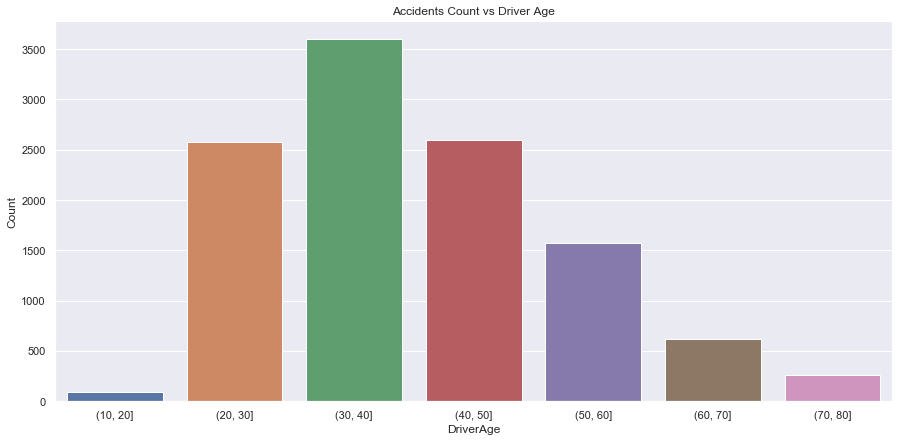

In [20]:
plt.figure(figsize=(15, 7))
sns.barplot(AgeCount.index, AgeCount.Count);
plt.title('Accidents Count vs Driver Age');

We can definitely observe that 30-40 years old are most likely committing accidents directly followed by 20-30 and 40-50 age range. The majority of accidents is caused by 20-60 year-old drivers, this is totally expected since those drivers use cars more commonly. The distribution of accidents through Driver's age has the shape of a Gaussian distribution.<br><br>

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


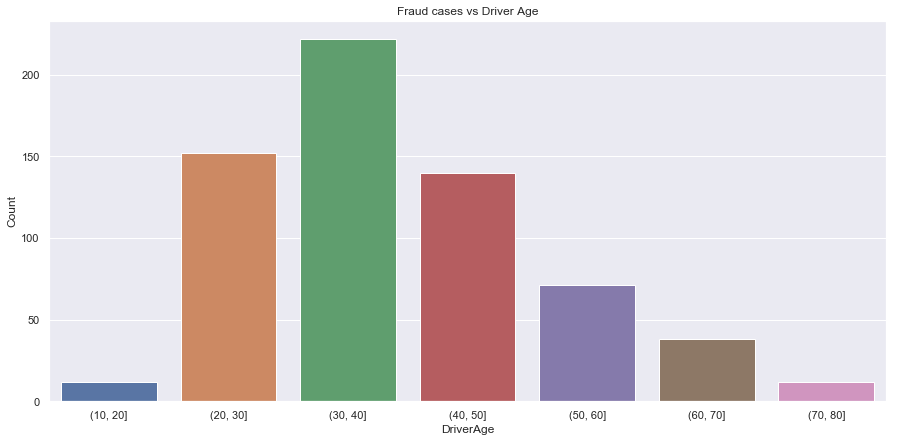

In [21]:
sns.set(style='darkgrid')
Age = frauds[['DriverAge']]
Age['Count'] = 1
AgeCount = Age.groupby(pd.cut(Age['DriverAge'], np.arange(10, 80+10, 10))).sum()
AgeCount = AgeCount.drop(columns=['DriverAge'])

plt.figure(figsize=(15, 7))
sns.barplot(AgeCount.index, AgeCount.Count);
plt.title('Fraud cases vs Driver Age');

Driver's age doesn't seem to be involved in fraud cases since its distibuttion remains the same.

**AgeOfVehicle**

In [22]:
VAge = train[['AgeOfVehicle']]
VAge['Count'] = 1
VAgeCount = VAge.groupby(VAge.AgeOfVehicle).sum()

VAgeCount

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Count
AgeOfVehicle,
2 years,59
3 years,109
4 years,166
5 years,1022
6 years,2575
7 years,4365
more than 7,2986
new,283


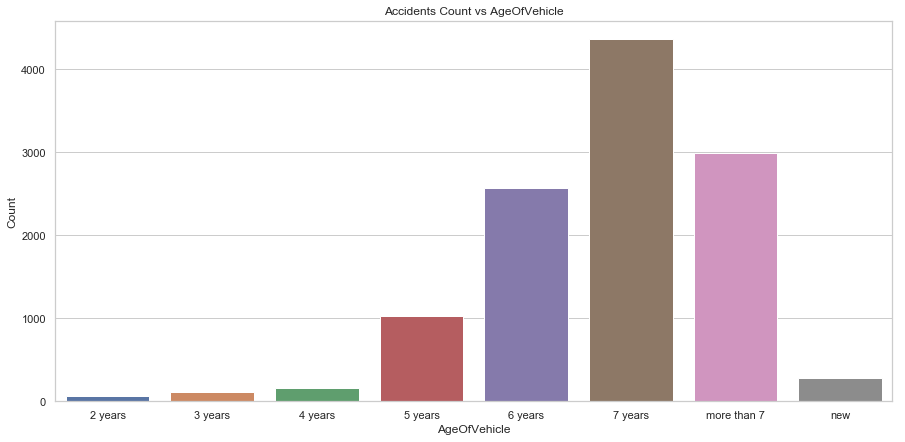

In [23]:
sns.set(style='whitegrid')
plt.figure(figsize=(15, 7))
sns.barplot(VAgeCount.index, VAgeCount.Count);
plt.title('Accidents Count vs AgeOfVehicle');

7-year aged vehicles are the most likely accidented vehicles. Meanwhile newer vehicles (<=4 years) are the least accidented vehicles. This can be explained by drivers care of newer vehicles.<br><br>

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


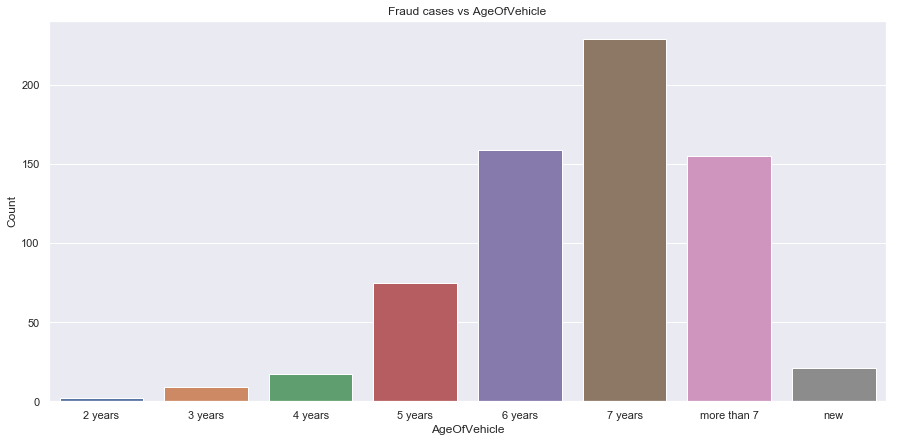

In [24]:
sns.set(style='darkgrid')
VAge = frauds[['AgeOfVehicle']]
VAge['Count'] = 1
VAgeCount = VAge.groupby(VAge.AgeOfVehicle).sum()

plt.figure(figsize=(15, 7))
sns.barplot(VAgeCount.index, VAgeCount.Count);
plt.title('Fraud cases vs AgeOfVehicle');

The age of vehicle also has the same distribution in fraud cases.

**Fault**

In [25]:
Faults = train[['Fault']]
Faults['Count'] = 1
FaultsCount = Faults.groupby(Faults.Fault).sum()

FaultsCount

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Count
Fault,
Policy Holder,8414
Third Party,3151


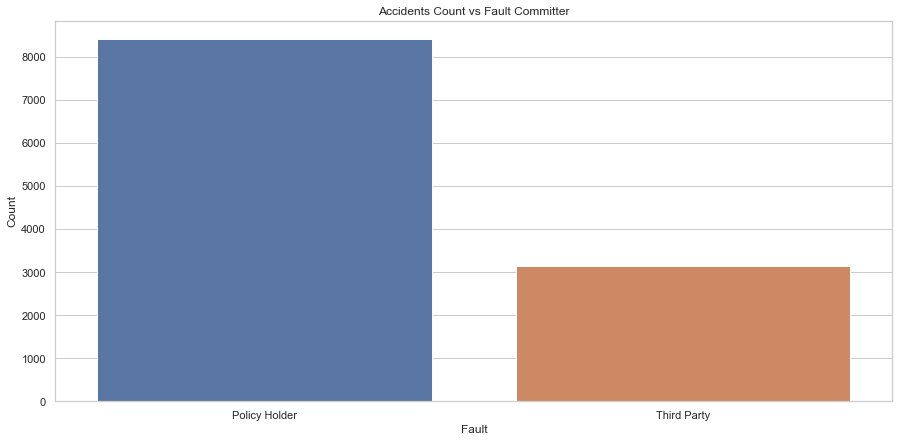

In [26]:
sns.set(style='whitegrid')
plt.figure(figsize=(15, 7))
sns.barplot(FaultsCount.index, FaultsCount.Count);
plt.title('Accidents Count vs Fault Committer');

Most of the faults (3/4) are committed by Policy holders.<br><br>

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


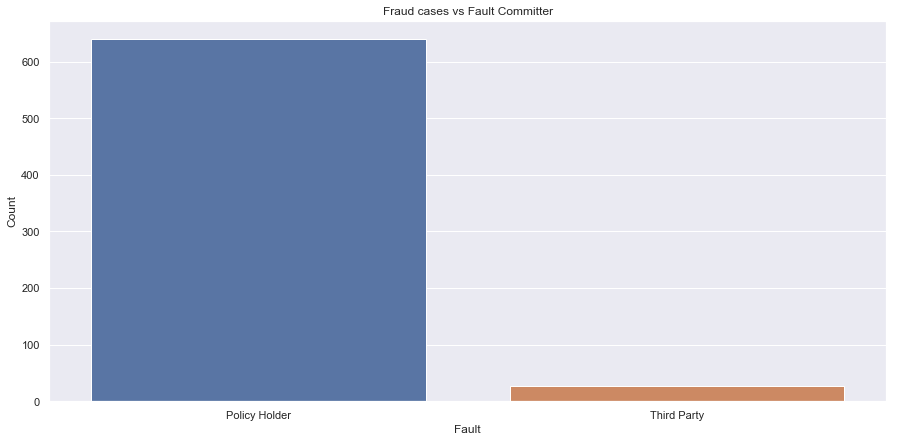

In [27]:
sns.set(style='darkgrid')
Faults = frauds[['Fault']]
Faults['Count'] = 1
FaultsCount = Faults.groupby(Faults.Fault).sum()

plt.figure(figsize=(15, 7))
sns.barplot(FaultsCount.index, FaultsCount.Count);
plt.title('Fraud cases vs Fault Committer');

Almost the totality of frauds are committed by policy holders and that is expected since they tend to earn more refunds.

**RepairerDetailID**

In [28]:
Repairer = train[['RepairerDetailID']]
Repairer['Count'] = 1
RepairerCount = Repairer.groupby(Repairer.RepairerDetailID).sum()
RepairerCount = RepairerCount.drop(columns=['RepairerDetailID'])
RepairerCount

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Count
RepairerDetailID,
1,734
2,712
3,707
4,701
5,756
6,722
7,783
8,690
9,744


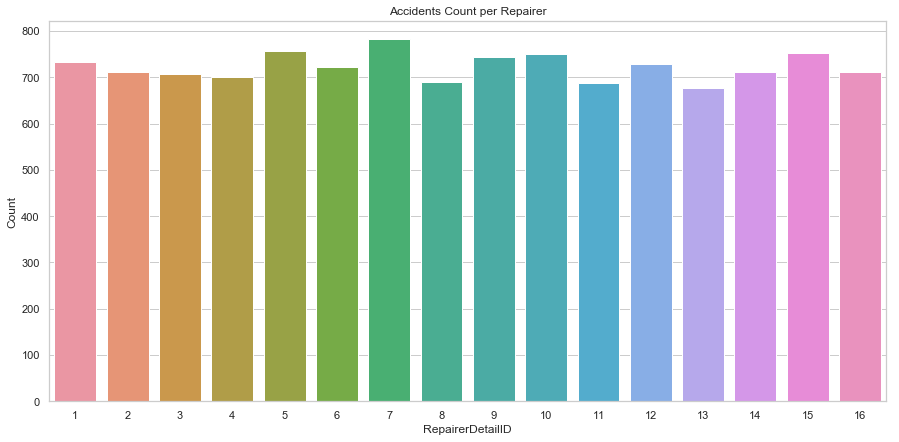

In [29]:
sns.set(style='whitegrid')
plt.figure(figsize=(15, 7))
sns.barplot(RepairerCount.index, RepairerCount.Count);
plt.title('Accidents Count per Repairer');

The accidented vehicles are evenly distributed on repairers. We expect a different distribution for fraud cases.<br><br>

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


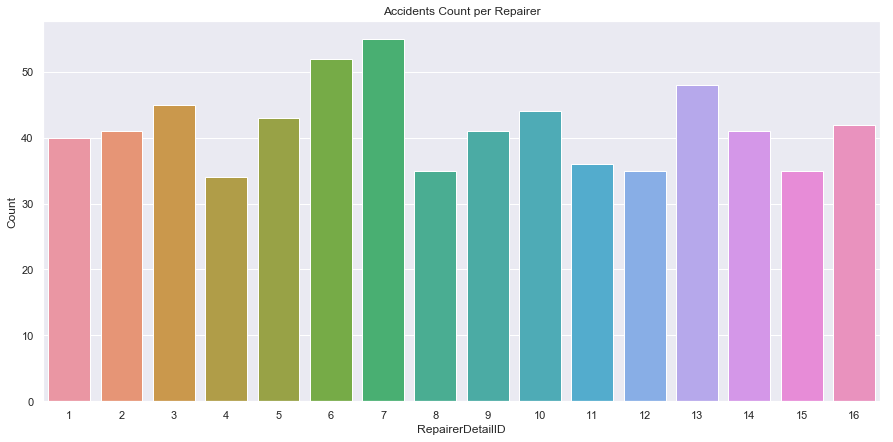

In [30]:
sns.set(style='darkgrid')
Repairer = frauds[['RepairerDetailID']]
Repairer['Count'] = 1
RepairerCount = Repairer.groupby(Repairer.RepairerDetailID).sum()
RepairerCount = RepairerCount.drop(columns=['RepairerDetailID'])

plt.figure(figsize=(15, 7))
sns.barplot(RepairerCount.index, RepairerCount.Count);
plt.title('Accidents Count per Repairer');

Rapairers 6 and 7 are the most involved in fraud cases with more than 100 fraud cases of total 667. 

**Make**

In [31]:
Marque = train[['Make']]
Marque['Count'] = 1
MarqueCount = Marque.groupby(Marque.Make).sum()
MarqueCount

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Count
Make,
Accura,370
BMW,11
Chevrolet,1292
Dodge,88
Ferrari,1
Ford,336
Honda,2103
Jaguar,4
Mazda,1754


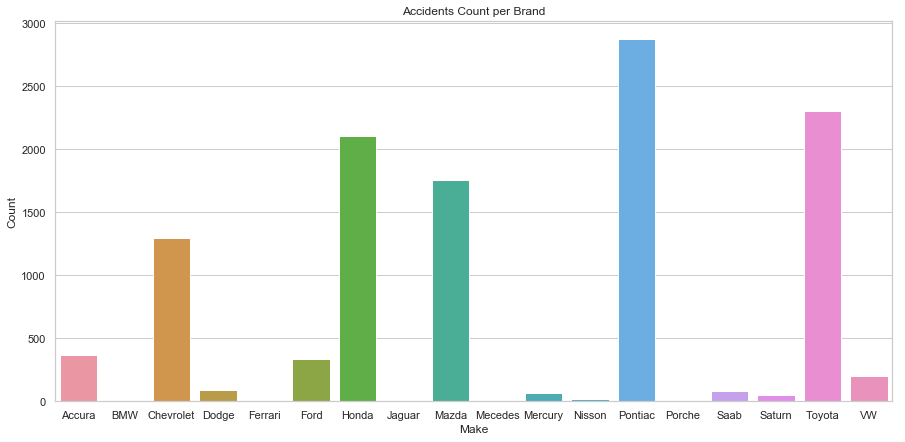

In [32]:
sns.set(style='whitegrid')
plt.figure(figsize=(15, 7))
sns.barplot(MarqueCount.index, MarqueCount.Count);
plt.title('Accidents Count per Brand');

We can notice here that luxurious brand vehicles are less accidented except for "Pontiac" which is a suspicious fact that we should dive in for further research.

In [33]:
Marque = frauds[['Make']]
Marque['Count'] = 1
MarqueCount = Marque.groupby(Marque.Make).sum()
MarqueCount

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Count
Make,
Accura,48
Chevrolet,73
Dodge,1
Ford,24
Honda,125
Mazda,86
Mecedes,1
Mercury,5
Nisson,1


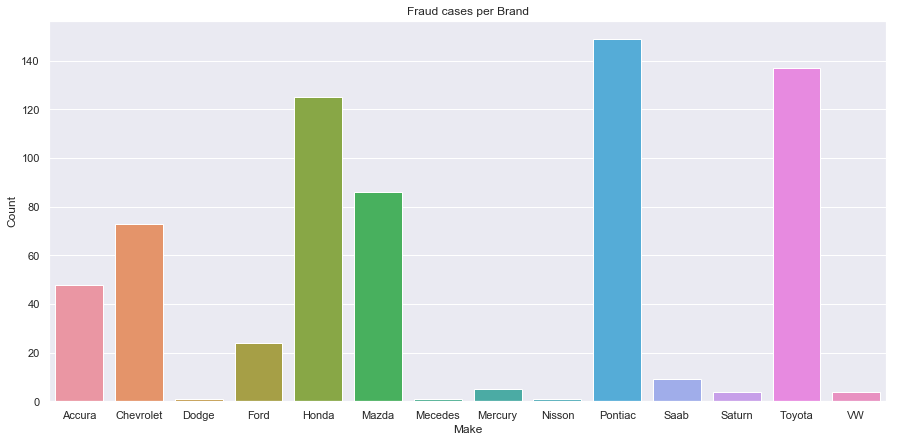

In [34]:
sns.set(style='darkgrid')
plt.figure(figsize=(15, 7))
sns.barplot(MarqueCount.index, MarqueCount.Count);
plt.title('Fraud cases per Brand');

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


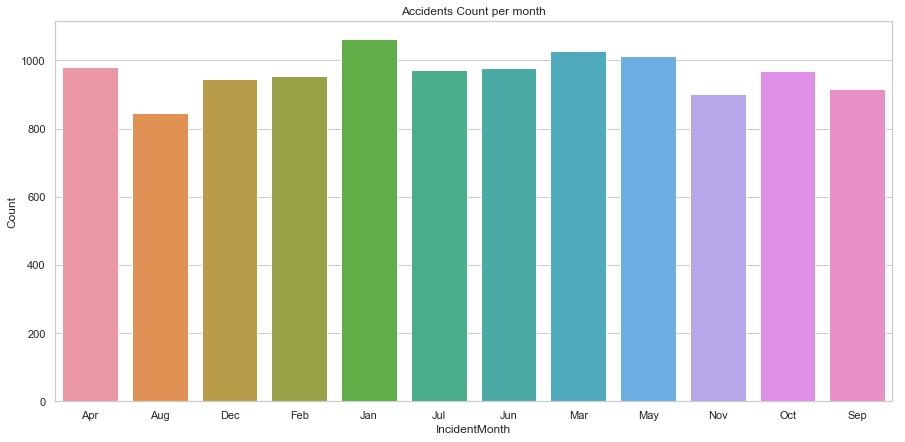

In [35]:
sns.set(style='whitegrid')
month = train[['IncidentMonth']]
month['Count'] = 1
monthCount = month.groupby(month.IncidentMonth).sum()

plt.figure(figsize=(15, 7))
sns.barplot(monthCount.index, monthCount.Count);
plt.title('Accidents Count per month');

There is no clear pattern about accidents occuring per month.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


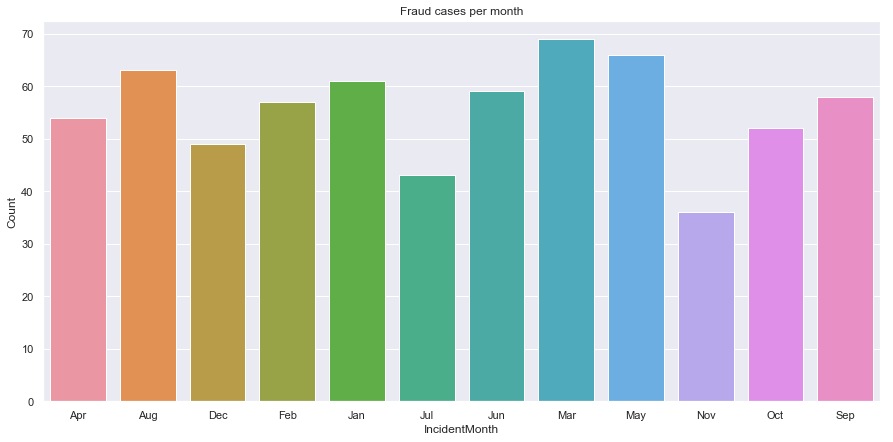

In [36]:
sns.set(style='darkgrid')
month = frauds[['IncidentMonth']]
month['Count'] = 1
monthCount = month.groupby(month.IncidentMonth).sum()

plt.figure(figsize=(15, 7))
sns.barplot(monthCount.index, monthCount.Count);
plt.title('Fraud cases per month');

There is a kind of seasonality in fraud reports but can can not bring a conclusion before performing a deep exploration through the dataset.

**NumberOfCars**

In [37]:
sns.set(style='whitegrid')
ncars = train[['NumberOfCars']]
ncars['Count'] = 1
ncarsCount = ncars.groupby(ncars.NumberOfCars).sum()
ncarsCount

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Count
NumberOfCars,
1 vehicle,10723
2 vehicles,541
3 to 4,282
5 to 8,17
more than 8,2


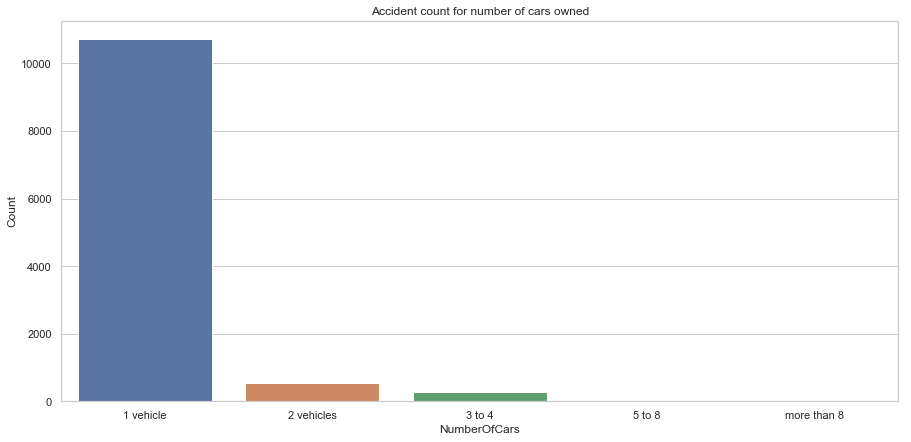

In [38]:
plt.figure(figsize=(15, 7))
sns.barplot(ncarsCount.index, ncarsCount.Count);
plt.title('Accident count for number of cars owned');

Drivers owning only one vehicle tend to commit much more incidents.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


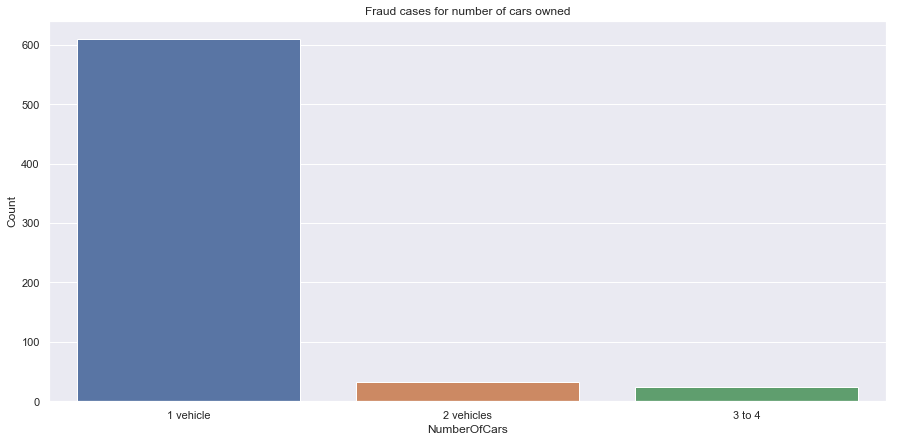

In [39]:
sns.set(style='darkgrid')
ncars = frauds[['NumberOfCars']]
ncars['Count'] = 1
ncarsCount = ncars.groupby(ncars.NumberOfCars).sum()

plt.figure(figsize=(15, 7))
sns.barplot(ncarsCount.index, ncarsCount.Count);
plt.title('Fraud cases for number of cars owned');

There is no fraud detected from drivers that own more than 4 cars. This gives us an idea about the social class of people committing frauds.

**DriverGender**

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


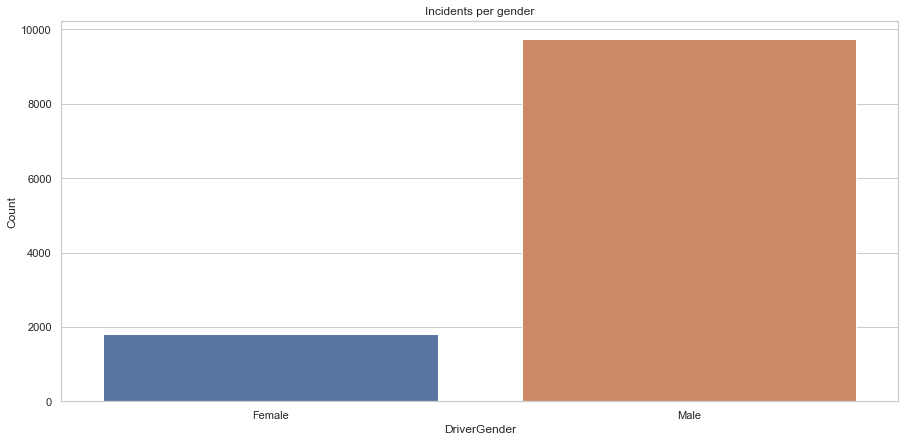

In [40]:
sns.set(style='whitegrid')
x = train[['DriverGender']]
x['Count'] = 1
xCount = x.groupby(x.DriverGender).sum()

plt.figure(figsize=(15, 7))
sns.barplot(xCount.index, xCount.Count);
plt.title('Incidents per gender');

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


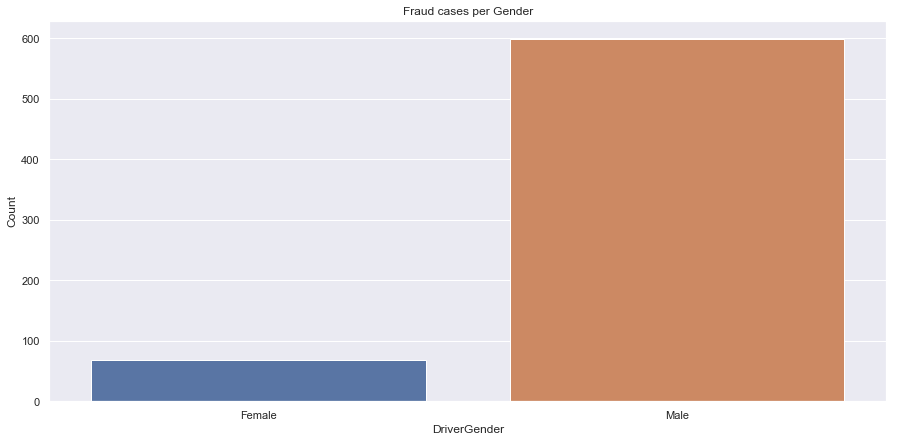

In [41]:
sns.set(style='darkgrid')
x = frauds[['DriverGender']]
x['Count'] = 1
xCount = x.groupby(x.DriverGender).sum()

plt.figure(figsize=(15, 7))
sns.barplot(xCount.index, xCount.Count);
plt.title('Fraud cases per Gender');

Since Males commit more accidents, they also tend to commit more vehicle insurance frauds.

**DriverMaritalStatus**

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


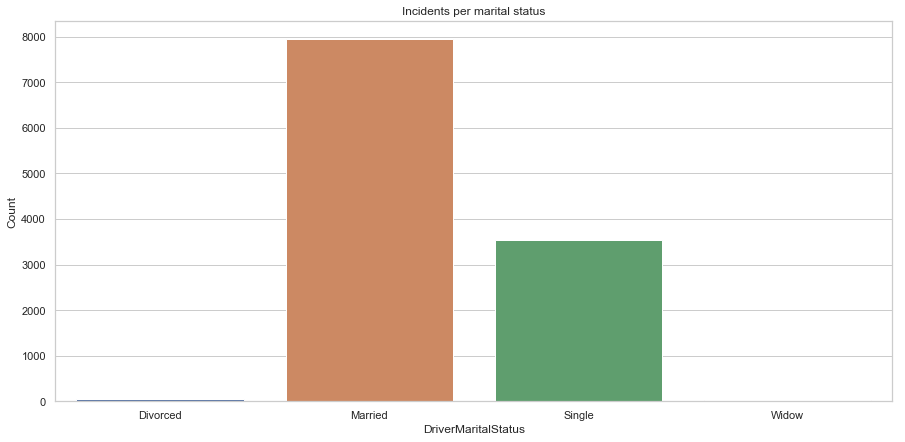

In [42]:
sns.set(style='whitegrid')
x = train[['DriverMaritalStatus']]
x['Count'] = 1
xCount = x.groupby(x.DriverMaritalStatus).sum()

plt.figure(figsize=(15, 7))
sns.barplot(xCount.index, xCount.Count);
plt.title('Incidents per marital status');

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


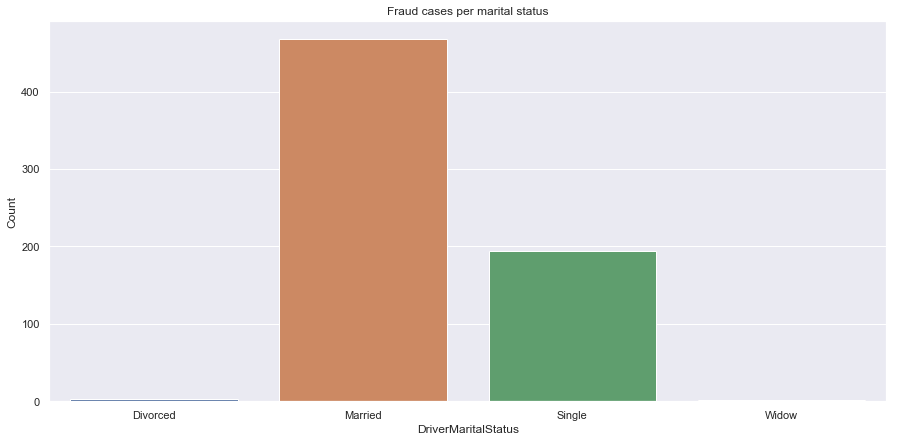

In [43]:
sns.set(style='darkgrid')
x = frauds[['DriverMaritalStatus']]
x['Count'] = 1
xCount = x.groupby(x.DriverMaritalStatus).sum()

plt.figure(figsize=(15, 7))
sns.barplot(xCount.index, xCount.Count);
plt.title('Fraud cases per marital status');

**VehicleCategory**

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


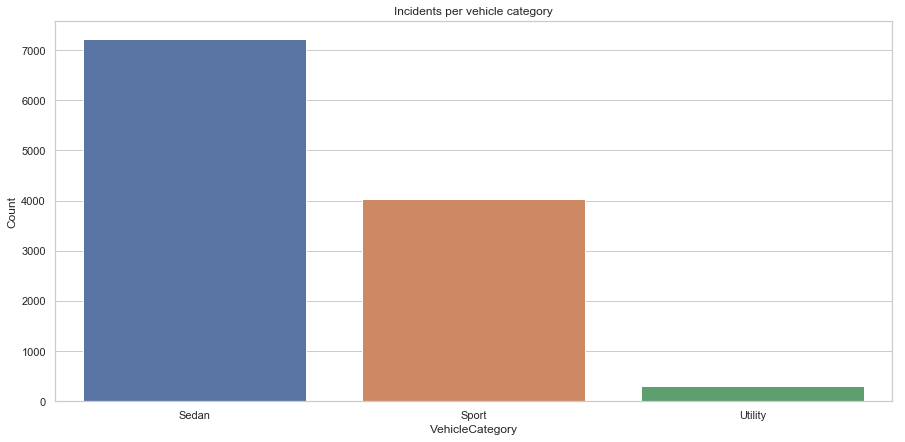

In [44]:
sns.set(style='whitegrid')
x = train[['VehicleCategory']]
x['Count'] = 1
xCount = x.groupby(x.VehicleCategory).sum()

plt.figure(figsize=(15, 7))
sns.barplot(xCount.index, xCount.Count);
plt.title('Incidents per vehicle category');

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


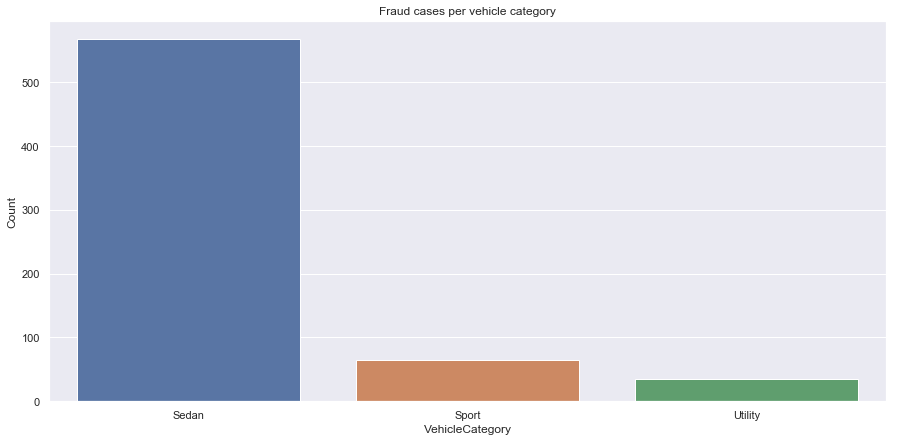

In [45]:
sns.set(style='darkgrid')
x = frauds[['VehicleCategory']]
x['Count'] = 1
xCount = x.groupby(x.VehicleCategory).sum()

plt.figure(figsize=(15, 7))
sns.barplot(xCount.index, xCount.Count);
plt.title('Fraud cases per vehicle category');

**PastNumberOfClaims**

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


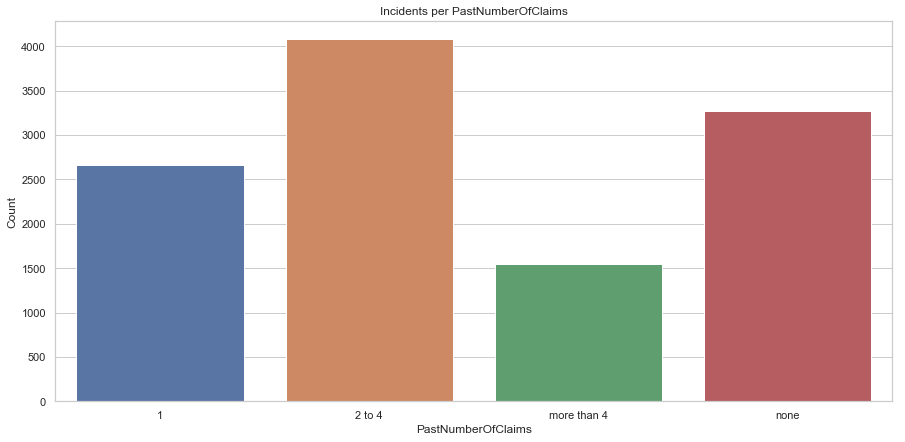

In [46]:
sns.set(style='whitegrid')
x = train[['PastNumberOfClaims']]
x['Count'] = 1
xCount = x.groupby(x.PastNumberOfClaims).sum()

plt.figure(figsize=(15, 7))
sns.barplot(xCount.index, xCount.Count);
plt.title('Incidents per PastNumberOfClaims');

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


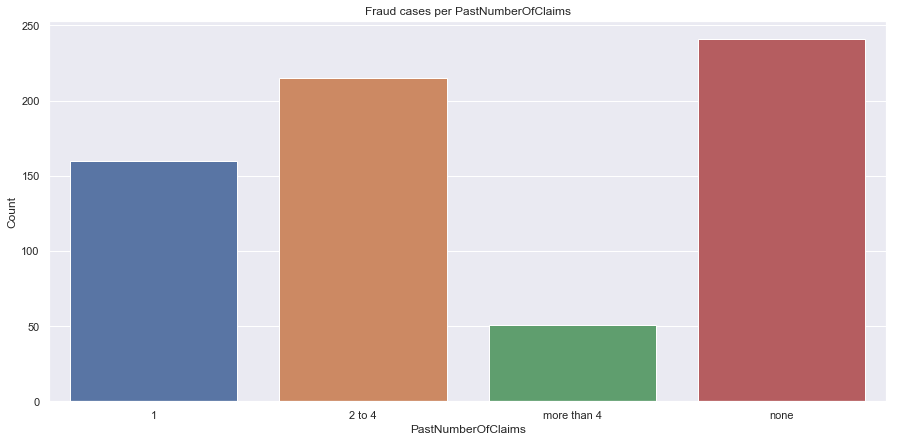

In [47]:
sns.set(style='darkgrid')
x = frauds[['PastNumberOfClaims']]
x['Count'] = 1
xCount = x.groupby(x.PastNumberOfClaims).sum()

plt.figure(figsize=(15, 7))
sns.barplot(xCount.index, xCount.Count);
plt.title('Fraud cases per PastNumberOfClaims');

**DriverRating**

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


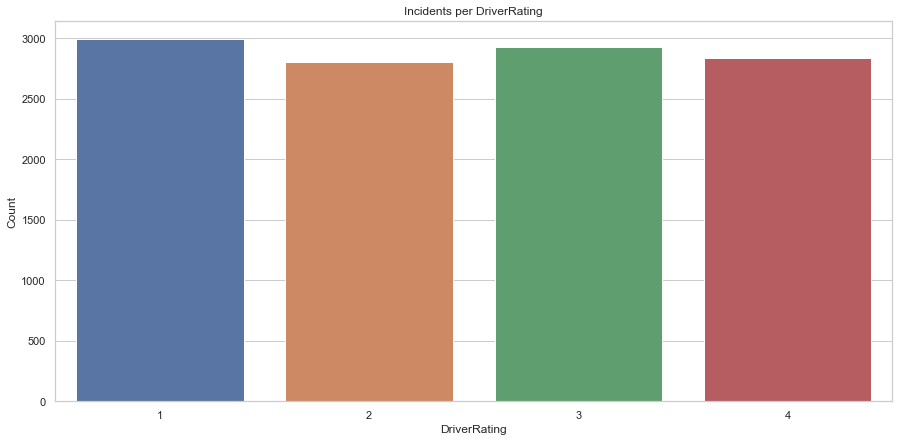

In [48]:
sns.set(style='whitegrid')
x = train[['DriverRating']]
x['Count'] = 1
xCount = x.groupby(x.DriverRating).sum()

plt.figure(figsize=(15, 7))
sns.barplot(xCount.index, xCount.Count);
plt.title('Incidents per DriverRating');

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


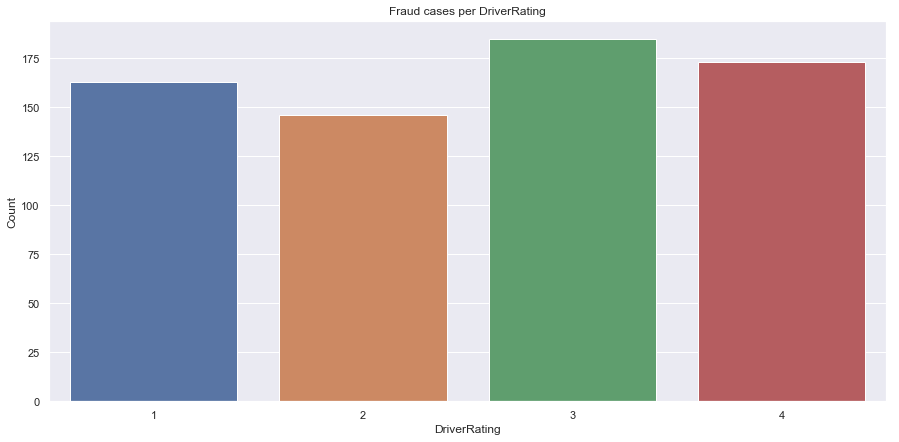

In [49]:
sns.set(style='darkgrid')
x = frauds[['DriverRating']]
x['Count'] = 1
xCount = x.groupby(x.DriverRating).sum()

plt.figure(figsize=(15, 7))
sns.barplot(xCount.index, xCount.Count);
plt.title('Fraud cases per DriverRating');

**WitnessPresent**

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


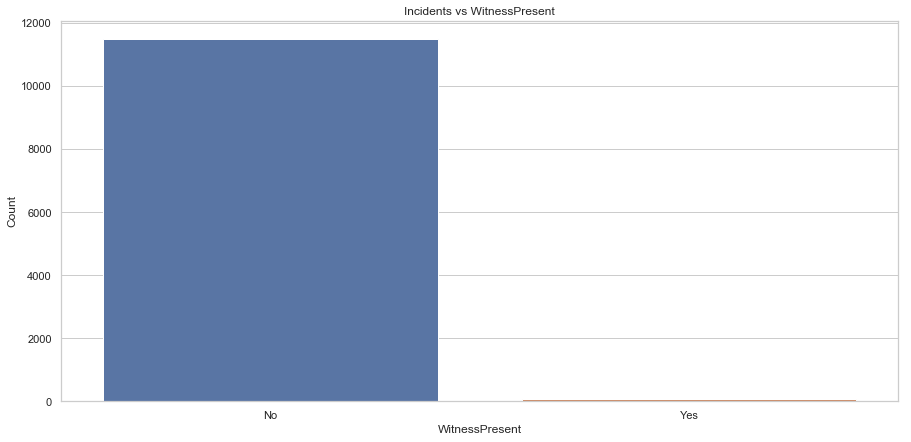

In [50]:
sns.set(style='whitegrid')
x = train[['WitnessPresent']]
x['Count'] = 1
xCount = x.groupby(x.WitnessPresent).sum()

plt.figure(figsize=(15, 7))
sns.barplot(xCount.index, xCount.Count);
plt.title('Incidents vs WitnessPresent');

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


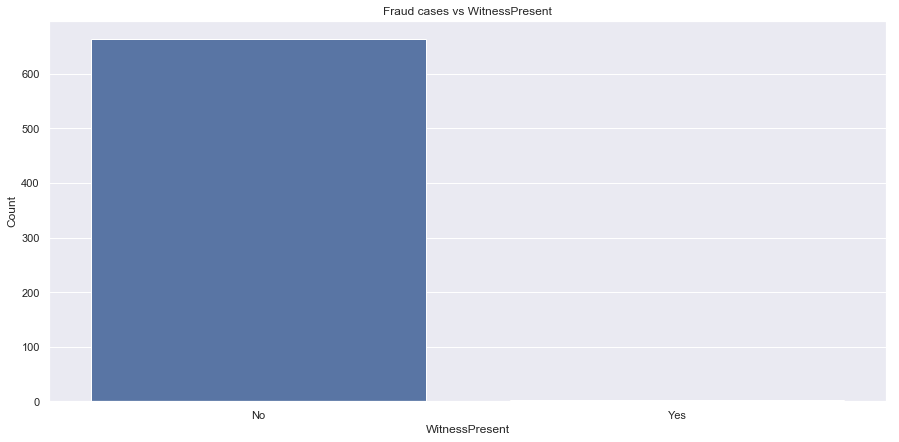

In [51]:
sns.set(style='darkgrid')
x = frauds[['WitnessPresent']]
x['Count'] = 1
xCount = x.groupby(x.WitnessPresent).sum()

plt.figure(figsize=(15, 7))
sns.barplot(xCount.index, xCount.Count);
plt.title('Fraud cases vs WitnessPresent');

In [52]:
xCount

,Count
WitnessPresent,
No,664
Yes,3


**AddressChangeClaim**

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


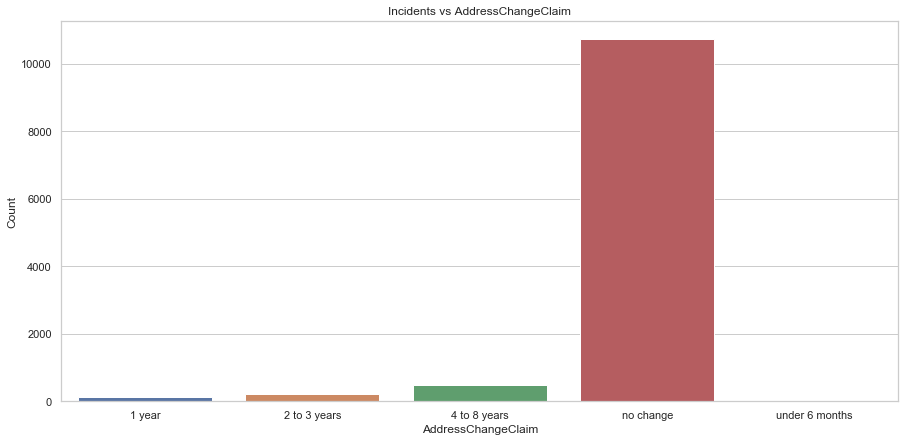

In [53]:
sns.set(style='whitegrid')
x = train[['AddressChangeClaim']]
x['Count'] = 1
xCount = x.groupby(x.AddressChangeClaim).sum()

plt.figure(figsize=(15, 7))
sns.barplot(xCount.index, xCount.Count);
plt.title('Incidents vs AddressChangeClaim');

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


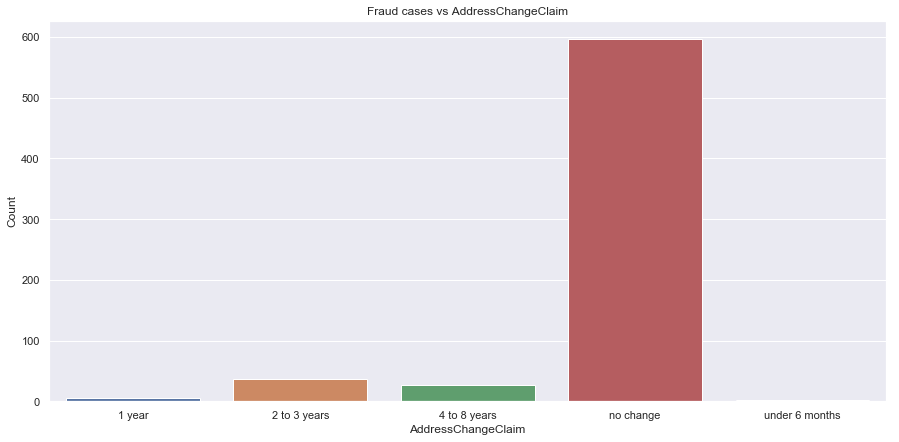

In [54]:
sns.set(style='darkgrid')
x = frauds[['AddressChangeClaim']]
x['Count'] = 1
xCount = x.groupby(x.AddressChangeClaim).sum()

plt.figure(figsize=(15, 7))
sns.barplot(xCount.index, xCount.Count);
plt.title('Fraud cases vs AddressChangeClaim');

**VehiclePrice**

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


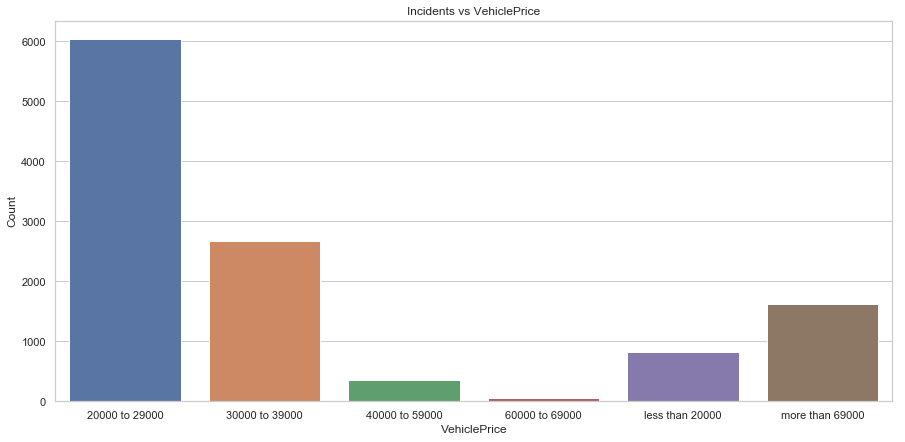

In [55]:
sns.set(style='whitegrid')
x = train[['VehiclePrice']]
x['Count'] = 1
xCount = x.groupby(x.VehiclePrice).sum()

plt.figure(figsize=(15, 7))
sns.barplot(xCount.index, xCount.Count);
plt.title('Incidents vs VehiclePrice');

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


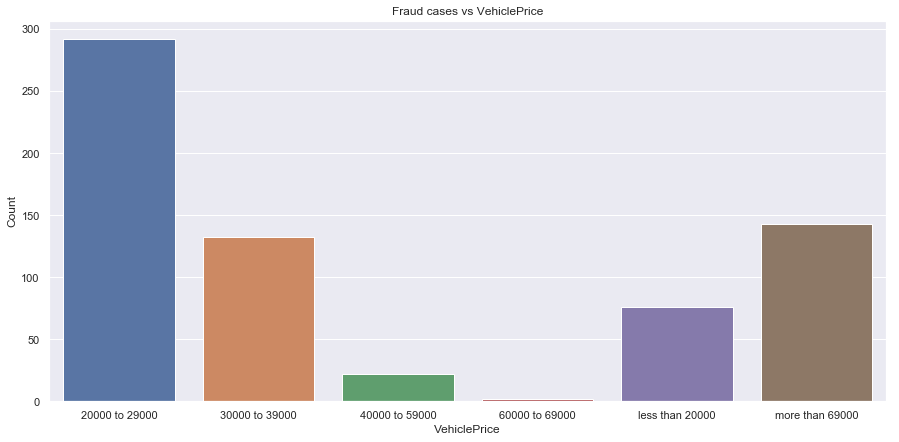

In [56]:
sns.set(style='darkgrid')
x = frauds[['VehiclePrice']]
x['Count'] = 1
xCount = x.groupby(x.VehiclePrice).sum()

plt.figure(figsize=(15, 7))
sns.barplot(xCount.index, xCount.Count);
plt.title('Fraud cases vs VehiclePrice');

**NumberOfSuppliments**

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


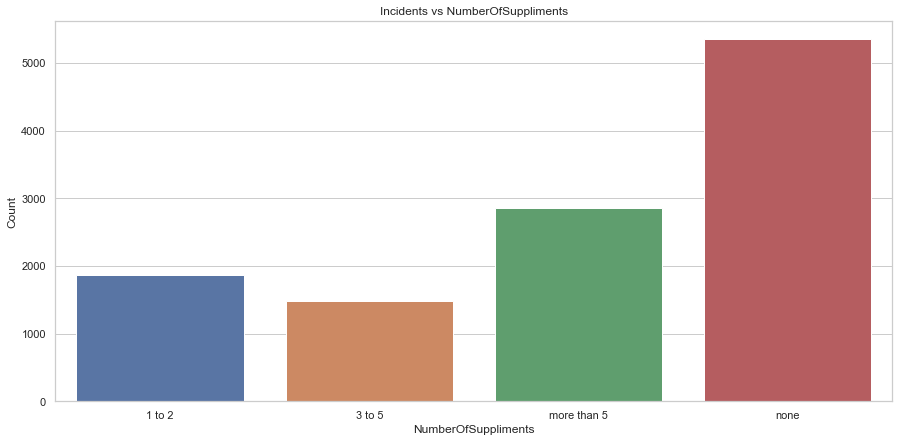

In [57]:
sns.set(style='whitegrid')
x = train[['NumberOfSuppliments']]
x['Count'] = 1
xCount = x.groupby(x.NumberOfSuppliments).sum()

plt.figure(figsize=(15, 7))
sns.barplot(xCount.index, xCount.Count);
plt.title('Incidents vs NumberOfSuppliments');

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


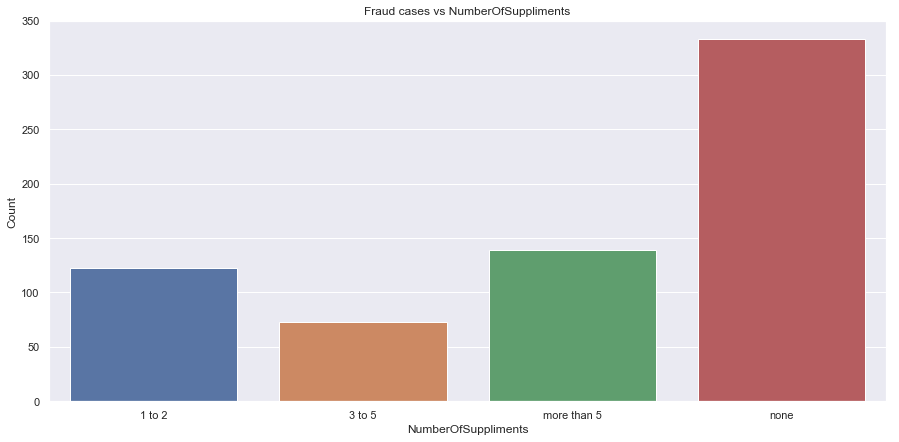

In [58]:
sns.set(style='darkgrid')
x = frauds[['NumberOfSuppliments']]
x['Count'] = 1
xCount = x.groupby(x.NumberOfSuppliments).sum()

plt.figure(figsize=(15, 7))
sns.barplot(xCount.index, xCount.Count);
plt.title('Fraud cases vs NumberOfSuppliments');

**Deductible**

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


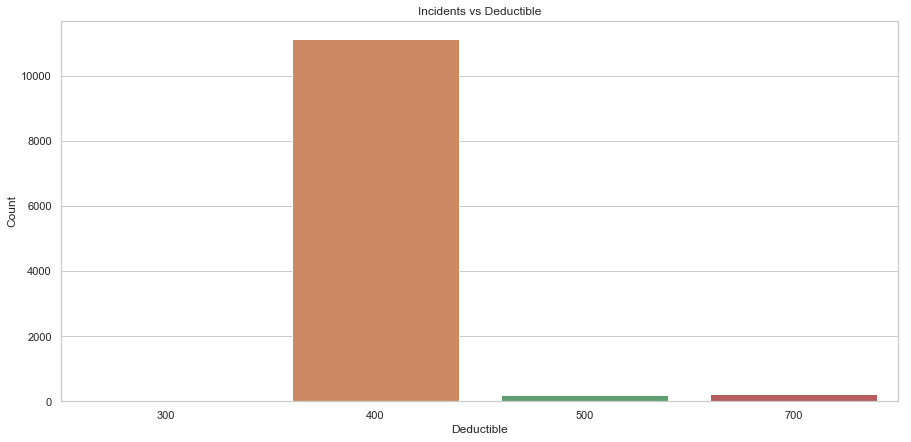

In [59]:
sns.set(style='whitegrid')
x = train[['Deductible']]
x['Count'] = 1
xCount = x.groupby(x.Deductible).sum()

plt.figure(figsize=(15, 7))
sns.barplot(xCount.index, xCount.Count);
plt.title('Incidents vs Deductible');

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


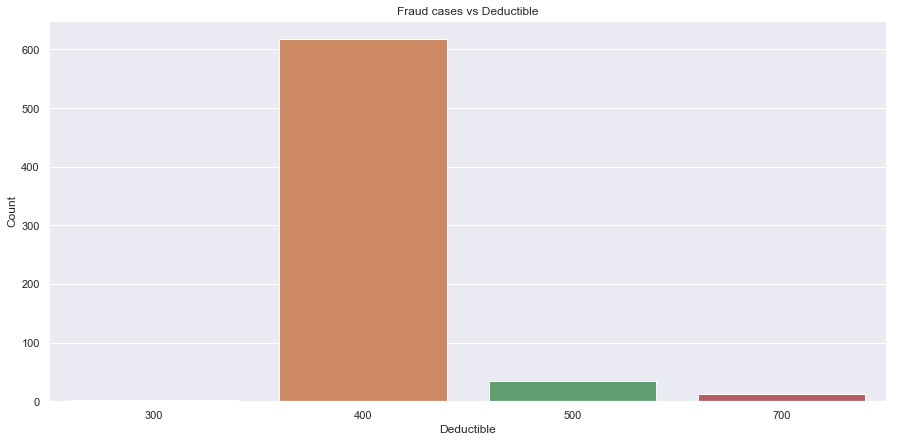

In [60]:
sns.set(style='darkgrid')
x = frauds[['Deductible']]
x['Count'] = 1
xCount = x.groupby(x.Deductible).sum()

plt.figure(figsize=(15, 7))
sns.barplot(xCount.index, xCount.Count);
plt.title('Fraud cases vs Deductible');

**Correlartion Matrix**

In [61]:
def corrMatrix(data):    
    # Compute the correlation matrix
    corr = data.corr()

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

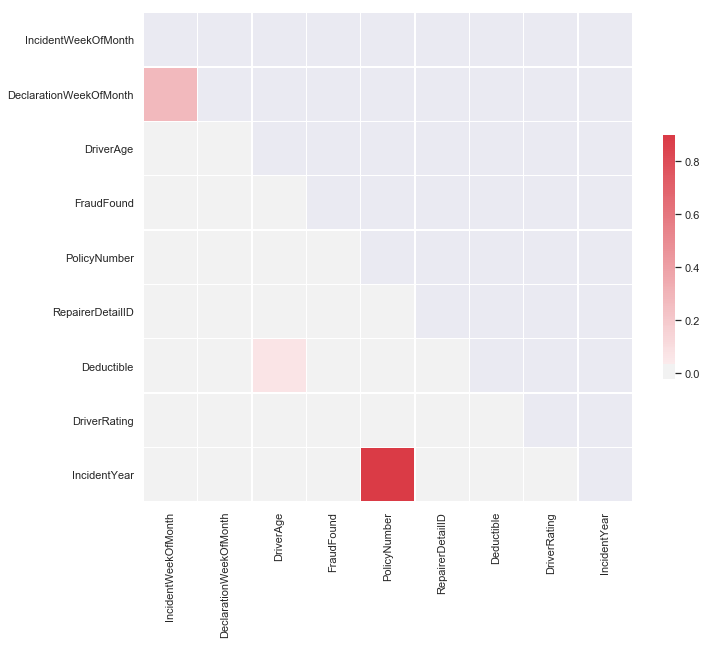

In [62]:
corrMatrix(train)

From the correlation matrix above we can see that PolicyNumber is highly correlated IncidentYear but it has no significant meaning concerning frauds. Also DeclarationWeekOfMonth is correlated with IncidentWeekOfMonth and this is due to a relatively fixed period of time between the incident and the declaration.

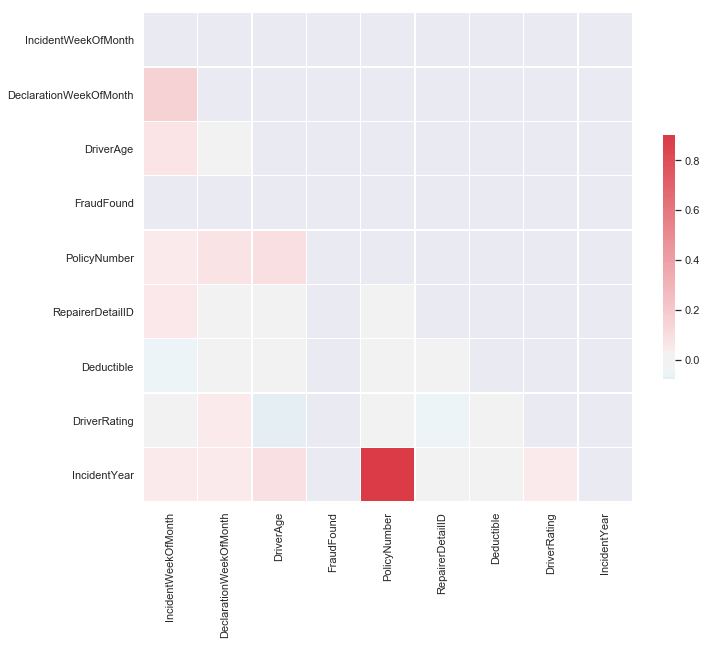

In [63]:
corrMatrix(frauds)

## Data Preparation (Cleaning + Preprocessing)

In [64]:
train.DeclarationMonth.value_counts()

Jan    1089
May    1044
Mar    1036
Oct     999
Feb     964
Apr     963
Jun     950
Nov     945
Jul     942
Sep     926
Aug     864
Dec     842
0         1
Name: DeclarationMonth, dtype: int64

We should get rid of '0' value in declaration month feature which is considered as an outlier.

In [65]:
train = train[train.DeclarationMonth != '0']

#### Checking missing values

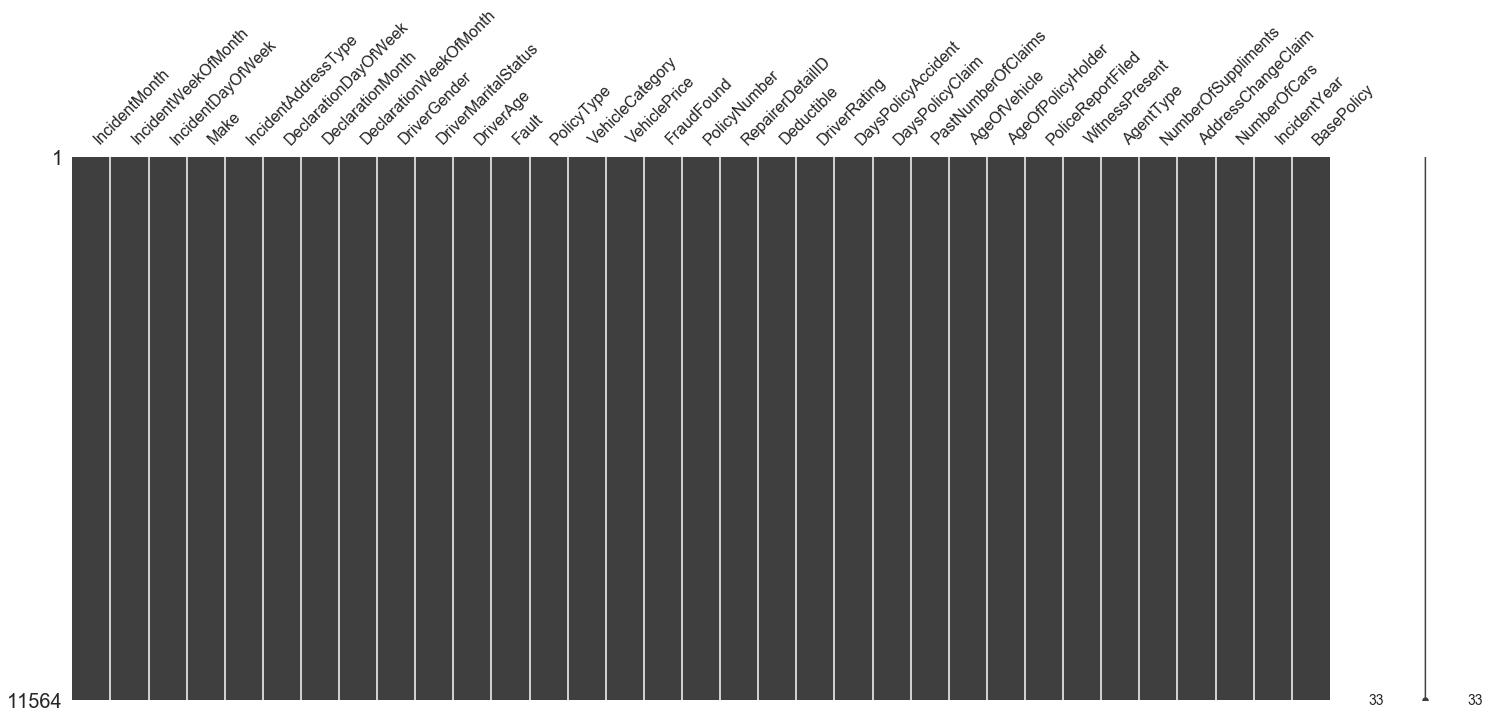

In [66]:
import missingno as msno
msno.matrix(train)

Using 'missingno' library, we can clearly notice that there is no missing values in our dataset.

## Feature Engineering (Encoding Categorical Attributes)

In [67]:
train.dtypes

IncidentMonth             object
IncidentWeekOfMonth        int64
IncidentDayOfWeek         object
Make                      object
IncidentAddressType       object
DeclarationDayOfWeek      object
DeclarationMonth          object
DeclarationWeekOfMonth     int64
DriverGender              object
DriverMaritalStatus       object
DriverAge                  int64
Fault                     object
PolicyType                object
VehicleCategory           object
VehiclePrice              object
FraudFound                 int64
PolicyNumber               int64
RepairerDetailID           int64
Deductible                 int64
DriverRating               int64
DaysPolicyAccident        object
DaysPolicyClaim           object
PastNumberOfClaims        object
AgeOfVehicle              object
AgeOfPolicyHolder         object
PoliceReportFiled         object
WitnessPresent            object
AgentType                 object
NumberOfSuppliments       object
AddressChangeClaim        object
NumberOfCa

In [68]:
train.select_dtypes(include='object').columns

Index(['IncidentMonth', 'IncidentDayOfWeek', 'Make', 'IncidentAddressType',
       'DeclarationDayOfWeek', 'DeclarationMonth', 'DriverGender',
       'DriverMaritalStatus', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'DaysPolicyAccident', 'DaysPolicyClaim',
       'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder',
       'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChangeClaim', 'NumberOfCars',
       'BasePolicy'],
      dtype='object')

These categorical features above will cause problems in the modeling phasis.That's why we are going to encode each categorical variable with appropriate numeric values.

In [69]:
train_enc =train

cleanup_nums = {"IncidentMonth":     {"Jan":1,"Feb":2,"Mar":3,"Apr":4,"May":5,"Jun":6,"Jul":7,"Aug":8,"Sep":9,
                                      "Oct":10,"Nov":11,"Dec":12},
                
                "IncidentDayOfWeek": {"Monday": 1, "Tuesday": 2, "Wednesday": 3, "Thursday": 4,"Friday": 5, "Saturday": 6,
                                      "Sunday":7 },
                
                "Make": {"Pontiac":1,"Toyota":2,"Honda":3,"Mazda":4,"Chevrolet":5,"Accura":6,"Ford":7,"VW":8,"Dodge":9,
                         "Saab":10,"Mercury":11,"Saturn":12,"Nisson":13,"BMW":14,"Porche":15,"Jaguar":16,"Mecedes":17,
                         "Ferrari":18},
                
                "IncidentAddressType" : {"Urban":1,"Rural":0},
                
                "DeclarationDayOfWeek": {"Monday": 1, "Tuesday": 2, "Wednesday": 3, "Thursday": 4,"Friday": 5,
                                         "Saturday": 6,"Sunday":7 },
                
                "DeclarationMonth": {"Jan":1,"Feb":2,"Mar":3,"Apr":4,"May":5,"Jun":6,"Jul":7,"Aug":8,"Sep":9,
                                      "Oct":10,"Nov":11,"Dec":12},
                
                "DriverGender": {"Male":0,"Female":1},
                
                "DriverMaritalStatus":{"Married":0,"Single":1,"Divorced":2,"Widow":3},
                
                "Fault":{"Policy Holder":0,"Third Party":1},
                
                "PolicyType":{"Sedan - Collision":0,"Sedan - Liability":1,"Sedan - All Perils":2,
                              "Utility - Collision":3,"Utility - Liability":4,"Utility - All Perils":5,
                              "Sport - Collision":6,"Sport - Liability":7,"Sport - All Perils":8},
                
                "VehicleCategory":{"Sedan":0,"Sport":1,"Utility":2},
                
                "VehiclePrice":{"less than 20000":0,"20000 to 29000":1,"30000 to 39000":2,"40000 to 59000":3,
                               "60000 to 69000":4,"more than 69000":5},
                 
                "DaysPolicyAccident":{"none":0,"1 to 7":1,"8 to 15":2,"15 to 30":3,"more than 30":4},
                
                "DaysPolicyClaim":{"8 to 15":0,"15 to 30":1,"more than 30":2},
                
                "PastNumberOfClaims":{"none":0,"1":1,"2 to 4":2,"more than 4":3},
                
                "AgeOfVehicle":{"new":0,"2 years":1,"3 years":2,"4 years":3,"5 years":4,"6 years":5,"7 years":6,
                               "more than 7":7},
                
                "AgeOfPolicyHolder":{"16 to 17":0,"18 to 20":1,"21 to 25":2,"26 to 30":3,"31 to 35":4,"36 to 40":5,
                                     "41 to 50":6,"51 to 65":7,"over 65":8},
                
                "PoliceReportFiled":{"No":0,"Yes":1},
                
                "WitnessPresent":{"No":0,"Yes":1},
                
                "AgentType":{"External":0,"Internal":1},
                
                "NumberOfSuppliments":{"none":0,"1 to 2":1,"3 to 5":2,"more than 5":3},
                
                "AddressChangeClaim":{"no change":0,"under 6 months":1,"1 year":2,"2 to 3 years":3,"4 to 8 years":4},
                
                "NumberOfCars":{"1 vehicle":0,"2 vehicles":1,"3 to 4":2,"5 to 8":3,"more than 8":4},
                
                "BasePolicy":{"Collision":0,"Liability":1,"All Perils":2}              
               }

train_enc.replace(cleanup_nums, inplace=True)
train_enc.head()

,IncidentMonth,IncidentWeekOfMonth,IncidentDayOfWeek,Make,IncidentAddressType,DeclarationDayOfWeek,DeclarationMonth,DeclarationWeekOfMonth,DriverGender,DriverMaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChangeClaim,NumberOfCars,IncidentYear,BasePolicy
1,9,4,1,4,1,2,10,2,0,0,...,7,8,0,0,0,0,0,0,1994,2
2,3,3,5,5,0,3,3,4,0,0,...,7,8,0,0,0,3,0,0,1994,2
3,1,3,1,1,1,2,1,3,0,0,...,7,7,0,0,0,0,0,0,1996,2
4,6,4,1,4,1,3,6,5,0,0,...,7,6,0,0,0,1,0,0,1996,1
5,7,4,6,3,1,4,8,2,0,0,...,7,5,0,0,0,0,0,0,1994,0


In [70]:
train_enc.dtypes

IncidentMonth             int64
IncidentWeekOfMonth       int64
IncidentDayOfWeek         int64
Make                      int64
IncidentAddressType       int64
DeclarationDayOfWeek      int64
DeclarationMonth          int64
DeclarationWeekOfMonth    int64
DriverGender              int64
DriverMaritalStatus       int64
DriverAge                 int64
Fault                     int64
PolicyType                int64
VehicleCategory           int64
VehiclePrice              int64
FraudFound                int64
PolicyNumber              int64
RepairerDetailID          int64
Deductible                int64
DriverRating              int64
DaysPolicyAccident        int64
DaysPolicyClaim           int64
PastNumberOfClaims        int64
AgeOfVehicle              int64
AgeOfPolicyHolder         int64
PoliceReportFiled         int64
WitnessPresent            int64
AgentType                 int64
NumberOfSuppliments       int64
AddressChangeClaim        int64
NumberOfCars              int64
Incident

Now the correlation matrix should allow us to spot any existing correlation between every pair of variables since all the variables became numeric.

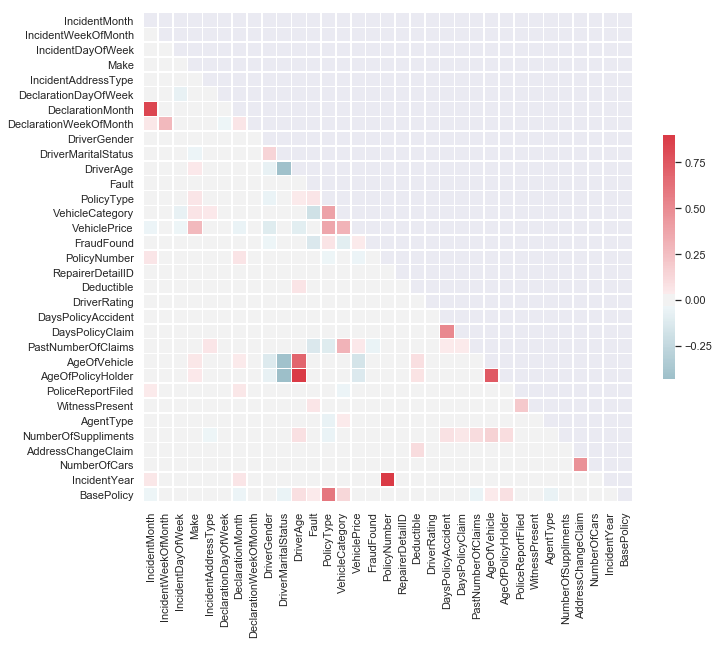

In [71]:
corrMatrix(train_enc)

In addition to previous observations, we clearly see from the correlation matrix above that DriverAge is highly correlated with AgeOfPolicyHolder which is totally obvious(and makes us more confident about our encoding method).<br>
VehicleCategory and vehicle category are proportional and that's logic.
There are several correlations shown that make us more confident about our encoding, but **the most important fact is that our target feature:'FraudFound' is not correlated with any other feature and that is promising for a good model fitting since no correlation means that none of our predicting variables should cause overfitting.**

In [72]:
frauds_enc = train_enc[train_enc['FraudFound']==1]
frauds_enc.head()

,IncidentMonth,IncidentWeekOfMonth,IncidentDayOfWeek,Make,IncidentAddressType,DeclarationDayOfWeek,DeclarationMonth,DeclarationWeekOfMonth,DriverGender,DriverMaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChangeClaim,NumberOfCars,IncidentYear,BasePolicy
31,1,2,1,5,1,3,1,3,0,0,...,6,4,0,0,0,0,0,0,1994,0
32,8,2,3,2,1,4,8,3,0,0,...,6,5,0,0,0,1,0,0,1994,2
58,11,2,4,2,0,5,11,2,0,0,...,3,6,0,0,0,0,0,0,1995,0
86,4,2,3,4,1,4,4,3,0,0,...,6,5,0,0,0,0,0,0,1996,2
115,6,4,3,2,1,1,6,4,1,0,...,6,4,0,0,0,3,0,0,1994,0


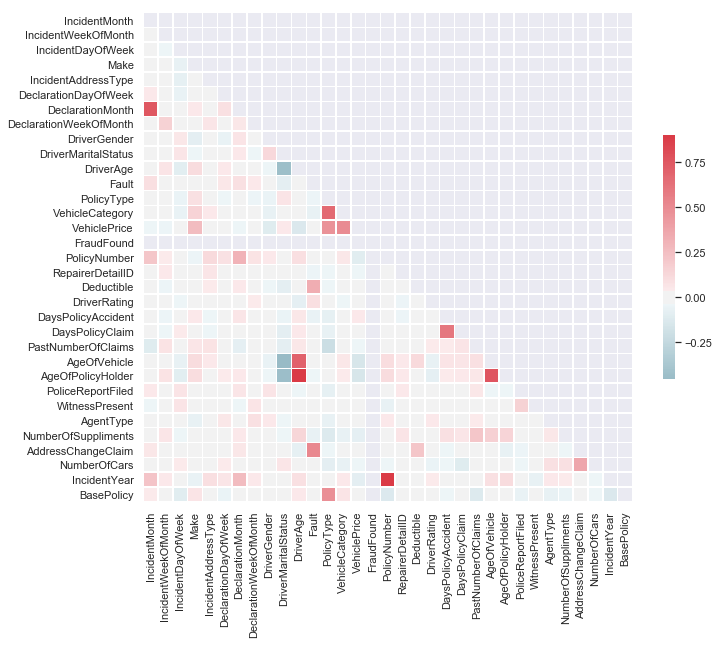

In [73]:
corrMatrix(frauds_enc)

Now that all the features are numeric we can move to the modeling phasis.

We will try to use **XGBoost** (tree-based) model for classification in order to spot feature importances when predicting the value of 'FraudFound' and then it will be clear to identify which are the most important features that indicate if there is a fraud case or not. Then we can discard features that the model does not consider usefull in decision making.

## Feature selection through feature importance

In [74]:
train_enc.head()

,IncidentMonth,IncidentWeekOfMonth,IncidentDayOfWeek,Make,IncidentAddressType,DeclarationDayOfWeek,DeclarationMonth,DeclarationWeekOfMonth,DriverGender,DriverMaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChangeClaim,NumberOfCars,IncidentYear,BasePolicy
1,9,4,1,4,1,2,10,2,0,0,...,7,8,0,0,0,0,0,0,1994,2
2,3,3,5,5,0,3,3,4,0,0,...,7,8,0,0,0,3,0,0,1994,2
3,1,3,1,1,1,2,1,3,0,0,...,7,7,0,0,0,0,0,0,1996,2
4,6,4,1,4,1,3,6,5,0,0,...,7,6,0,0,0,1,0,0,1996,1
5,7,4,6,3,1,4,8,2,0,0,...,7,5,0,0,0,0,0,0,1994,0


Incident Month and year are not supposed to give additional information for our case. Leaving them in the dataset will lower model's performance.

In [75]:
train_enc = train_enc.drop('IncidentMonth', axis=1)
train_enc = train_enc.drop('IncidentYear', axis=1)

In [76]:
X_data = train_enc.drop('FraudFound', axis=1)
y = train_enc.FraudFound

In [77]:
seed = 42
test_size = 0.25
X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=test_size, random_state=seed)

## Linear SVM Model

In [82]:
#Train linear SVM Model for Classification
from sklearn.svm import SVC  
svclassifier = SVC(kernel='linear')  
svclassifier.fit(X_train, y_train)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [83]:
y_pred_svm = svclassifier.predict(X_test)

In [84]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred_svm))  
print(classification_report(y_test, y_pred_svm)) 

[[2718   29]
 [ 140    4]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2747
           1       0.12      0.03      0.05       144

   micro avg       0.94      0.94      0.94      2891
   macro avg       0.54      0.51      0.51      2891
weighted avg       0.91      0.94      0.92      2891



In [85]:
from sklearn.metrics import accuracy_score

print('Accuracy:', 100*accuracy_score(y_test,y_pred_svm),'%')

Accuracy: 94.15427187824282 %


In [86]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

# split data into X and y
X = train_enc.drop(columns=['FraudFound'])
Y = train_enc['FraudFound']
# CV model
kfold = StratifiedKFold(n_splits=10, random_state=7)
results = cross_val_score(svclassifier, X, Y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 93.40% (0.21%)


In [87]:
results

array([0.93258427, 0.93258427, 0.93604149, 0.93517718, 0.93344857,
       0.92912705, 0.93431288, 0.93593074, 0.93593074, 0.93506494])

Even if the accuracy is very good, the precision for class 1 (Fraud cases) is very low so we can not rely on this model since it predicted only 4 out of 144 fraud cases. That's why SVM model is not suitable for our case.

## Decision Tree Model

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
# Function to perform training with giniIndex. 
def train_using_gini(X_train, X_test, y_train): 
  
    # Creating the classifier object 
    clf_gini = DecisionTreeClassifier(criterion = "gini", 
            random_state = 42,max_depth=8, min_samples_leaf=5) 
  
    # Performing training 
    clf_gini.fit(X_train, y_train) 
    return clf_gini 
      
# Function to perform training with entropy. 
def tarin_using_entropy(X_train, X_test, y_train): 
  
    # Decision tree with entropy 
    clf_entropy = DecisionTreeClassifier( 
            criterion = "entropy", random_state = 42, 
            max_depth = 8, min_samples_leaf = 5) 
  
    # Performing training 
    clf_entropy.fit(X_train, y_train) 
    return clf_entropy 
  
# Function to make predictions 
def prediction(X_test, clf_object): 
  
    # Predicton on test with giniIndex 
    y_pred = clf_object.predict(X_test) 
    print("Predicted values:") 
    print(y_pred) 
    return y_pred 
      
# Function to calculate accuracy 
def cal_accuracy(y_test, y_pred): 
      
    print("Confusion Matrix:\n ", 
        confusion_matrix(y_test, y_pred)) 
      
    print ("Accuracy : ", 
    accuracy_score(y_test,y_pred)*100) 
      
    print("Report : ", 
    classification_report(y_test, y_pred))

In [51]:
clf_gini = train_using_gini(X_train, X_test, y_train) 
clf_entropy = tarin_using_entropy(X_train, X_test, y_train) 

In [52]:
print("***Results Using Gini Index:***") 
# Prediction using gini 
y_pred_gini = prediction(X_test, clf_gini) 
cal_accuracy(y_test, y_pred_gini) 
      
print("***Results Using Entropy:***") 
# Prediction using entropy 
y_pred_entropy = prediction(X_test, clf_entropy) 
cal_accuracy(y_test, y_pred_entropy) 

***Results Using Gini Index:***
Predicted values:
[0 0 0 ... 0 0 0]
Confusion Matrix:
  [[2719   28]
 [ 127   17]]
Accuracy :  94.63853337945348
Report :                precision    recall  f1-score   support

           0       0.96      0.99      0.97      2747
           1       0.38      0.12      0.18       144

   micro avg       0.95      0.95      0.95      2891
   macro avg       0.67      0.55      0.58      2891
weighted avg       0.93      0.95      0.93      2891

***Results Using Entropy:***
Predicted values:
[0 0 0 ... 0 0 0]
Confusion Matrix:
  [[2730   17]
 [ 133   11]]
Accuracy :  94.81148391560014
Report :                precision    recall  f1-score   support

           0       0.95      0.99      0.97      2747
           1       0.39      0.08      0.13       144

   micro avg       0.95      0.95      0.95      2891
   macro avg       0.67      0.54      0.55      2891
weighted avg       0.93      0.95      0.93      2891



In [53]:
proba_tree = clf_entropy.predict_proba(X_test)

In [82]:
def plot_roc_curve(fpr, tpr):
    plt.figure(figsize=(10,7))
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()   
    plt.show()

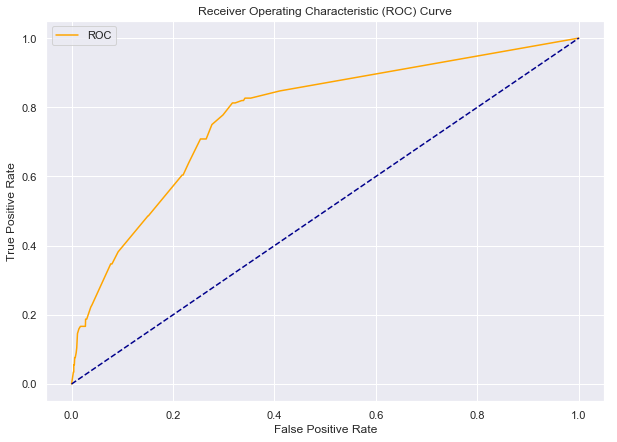

In [55]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, proba_tree[:,1]) 
#Plot ROC Curve using our defined function
plot_roc_curve(fpr, tpr) 

In [56]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test,y_pred_entropy)
print("AUC: ", auc)

AUC:  0.5351001597702544


Decision Tree Model gives us **94% accuracy** with both Gini Index and Entropy. But, again, **precision** for class 1 is **under 40%** in both cases which is not reliable.

## XGBoost Model

In [78]:
#Train the XGboost Model for Classification
weight = y_train.value_counts()[0]/y_train.value_counts()[1]

model1 = xgb.XGBClassifier(n_estimators=1000,
                           tree_method='gpu_exact',
                           learning_rate=0.07,
                           colsample_bytree = 0.7,
                           scale_pos_weight= weight,
                           eval_metric = "auc"
                          )

train_model1 = model1.fit(X_train, y_train)

In [79]:
#prediction 
pred1 = train_model1.predict(X_test)
#Predict probabilities for the test data
probs = train_model1.predict_proba(X_test) 

In [80]:
# Keep Probabilities of the positive class only.
probs = probs[:, 1]

In [81]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

# split data into X and y
X = train_enc.drop(columns=['FraudFound'])
Y = train_enc['FraudFound']
# CV model
kfold = StratifiedKFold(n_splits=10, random_state=7)
results = cross_validate(model1, X, Y, cv=kfold,scoring=scoring)

In [87]:
results

{'fit_time': array([2.58607936, 2.51826239, 2.40356779, 2.3397615 , 2.34273219,
        2.40656018, 2.3676641 , 2.42451191, 2.37282801, 2.38761115]),
 'score_time': array([0.02593136, 0.02194118, 0.02293849, 0.0219686 , 0.02196717,
        0.02094436, 0.02097082, 0.0209713 , 0.02198362, 0.02196693]),
 'test_accuracy': array([0.92134831, 0.91356958, 0.91270527, 0.92307692, 0.90060501,
        0.91702679, 0.92134831, 0.91168831, 0.92813853, 0.8978355 ]),
 'train_accuracy': array([0.94205823, 0.94388392, 0.94244259, 0.94032862, 0.94100125,
        0.94359566, 0.94570962, 0.94091651, 0.93947545, 0.94418292]),
 'test_precision': array([0.41176471, 0.35897436, 0.38513514, 0.41666667, 0.33783784,
        0.39568345, 0.40769231, 0.35714286, 0.43609023, 0.33116883]),
 'train_precision': array([0.49875104, 0.50677966, 0.50041701, 0.49138638, 0.49421488,
        0.50548523, 0.51502146, 0.49424342, 0.48820179, 0.50846024]),
 'test_recall': array([0.8358209 , 0.62686567, 0.85074627, 0.82089552, 0.7

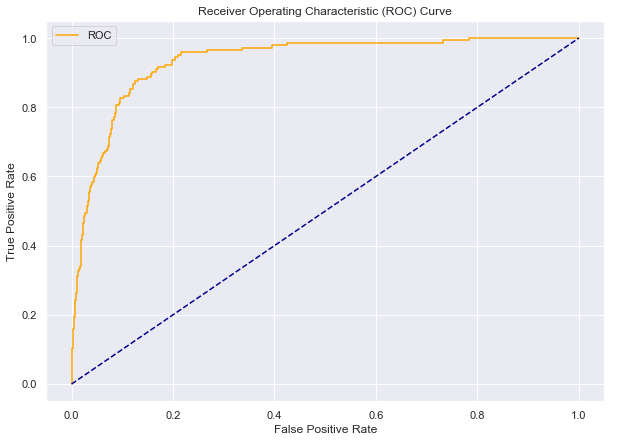

In [83]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs) 
#Plot ROC Curve using our defined function
plot_roc_curve(fpr, tpr) 

**AUC:** Area Under the Curve (ROC)

In [84]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test,pred1)
print("AUC: ", auc)

AUC:  0.8283759050277071


In [62]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,roc_curve,roc_auc_score

confusion_matrix(y_test, pred1)

array([[2529,  218],
       [  38,  106]], dtype=int64)

In [63]:
y_test.value_counts()

0    2747
1     144
Name: FraudFound, dtype: int64

**Accuracy**

In [64]:
from sklearn.metrics import accuracy_score

print('Accuracy:', 100*accuracy_score(y_test,pred1),'%')

Accuracy: 91.1449325492909 %


In [65]:
TN=confusion_matrix(y_test, pred1)[0][0]
TP=confusion_matrix(y_test, pred1)[1][1]
FN=confusion_matrix(y_test, pred1)[0][1]
FP=confusion_matrix(y_test, pred1)[1][0]

**Recall:** Out of all the positive classes, how many instances were identified correctly.

In [66]:
Recall = TP / (TP + FN)
Recall

0.3271604938271605

**Precision:** Out of all the predicted positive instances, how many were predicted correctly.**In our case of fraud detection, precision is the most important metric.**

In [67]:
Precision = TP / (TP + FP)
Precision

0.7361111111111112

**F-Score:** From Precision and Recall, F-Measure is computed and used as metrics sometimes. F – Measure is nothing but the harmonic mean of Precision and Recall.

In [68]:
FScore = (2 * Recall * Precision) / (Recall + Precision)
FScore

0.45299145299145294

**Feature importances**

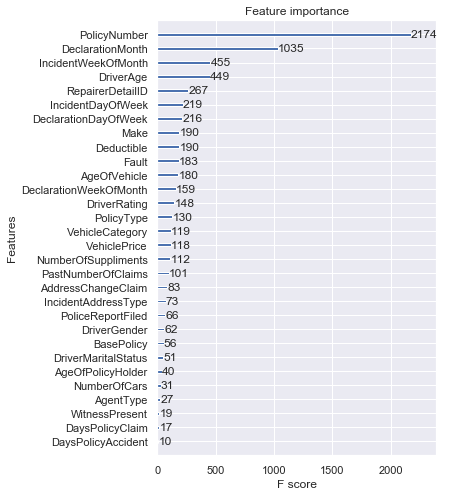

In [69]:
from xgboost import plot_importance
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(5, 8))
plot_importance(train_model1, ax=ax)

When comparing linear SVM, DecisionTree and XGBoost's , we figured out that XGboost wins the lead in terms of precision with 106 fraud cases predicted out of 144. That's why our scoring will be based on XGBoost's results.

# Scoring
    Now we will load a new dataframe and use our model to assign for each row its probability of being a fraud case

In [70]:
newData = pd.read_csv("insurance_fraud_test.csv", engine="python", index_col=0)

In [72]:
newData.head()

,IncidentMonth,IncidentWeekOfMonth,IncidentDayOfWeek,Make,IncidentAddressType,DeclarationDayOfWeek,DeclarationMonth,DeclarationWeekOfMonth,DriverGender,DriverMaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChangeClaim,NumberOfCars,IncidentYear,BasePolicy
1,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
2,Mar,5,Monday,Honda,Urban,Monday,Mar,5,Male,Married,...,more than 7,41 to 50,No,No,External,none,no change,1 vehicle,1994,Liability
3,Aug,3,Sunday,Mazda,Urban,Thursday,Aug,5,Male,Married,...,more than 7,51 to 65,No,No,External,1 to 2,no change,1 vehicle,1994,Liability
4,May,3,Monday,Mazda,Urban,Wednesday,May,4,Female,Married,...,7 years,36 to 40,No,No,External,none,no change,1 vehicle,1994,Collision
5,Mar,1,Sunday,Honda,Urban,Tuesday,Mar,2,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Collision


Checking if there is missing values

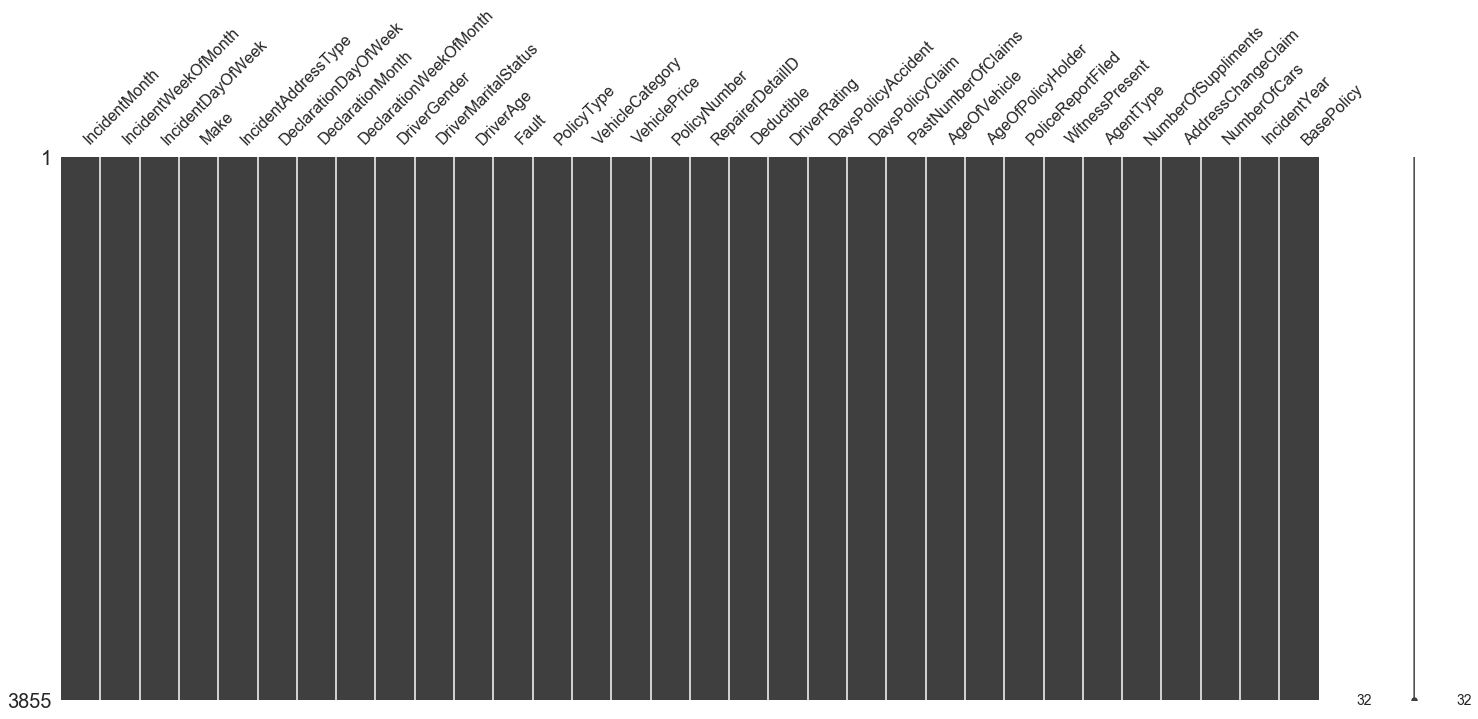

In [73]:
msno.matrix(newData)

Dropping invalid rows

In [74]:
newData = newData[newData.Make != 'Lexus']

Encoding newData to fill the model requirements

In [75]:
newData_enc =newData

newData_enc.replace(cleanup_nums, inplace=True)
newData_enc.head()

,IncidentMonth,IncidentWeekOfMonth,IncidentDayOfWeek,Make,IncidentAddressType,DeclarationDayOfWeek,DeclarationMonth,DeclarationWeekOfMonth,DriverGender,DriverMaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChangeClaim,NumberOfCars,IncidentYear,BasePolicy
1,6,2,6,2,0,5,7,1,0,0,...,7,7,1,0,0,3,0,0,1994,1
2,3,5,1,3,1,1,3,5,0,0,...,7,6,0,0,0,0,0,0,1994,1
3,8,3,7,4,1,4,8,5,0,0,...,7,7,0,0,0,1,0,0,1994,1
4,5,3,1,4,1,3,5,4,1,0,...,6,5,0,0,0,0,0,0,1994,0
5,3,1,7,3,1,2,3,2,0,1,...,0,0,0,0,0,0,0,0,1994,0


Dropping unuseful features

In [76]:
newData_enc = newData_enc.drop('IncidentMonth', axis=1)
newData_enc = newData_enc.drop('IncidentYear', axis=1)

Checking feature types

In [77]:
newData_enc.dtypes

IncidentWeekOfMonth        int64
IncidentDayOfWeek          int64
Make                       int64
IncidentAddressType        int64
DeclarationDayOfWeek       int64
DeclarationMonth           int64
DeclarationWeekOfMonth     int64
DriverGender               int64
DriverMaritalStatus        int64
DriverAge                  int64
Fault                      int64
PolicyType                 int64
VehicleCategory            int64
VehiclePrice               int64
PolicyNumber               int64
RepairerDetailID           int64
Deductible                 int64
DriverRating               int64
DaysPolicyAccident         int64
DaysPolicyClaim            int64
PastNumberOfClaims         int64
AgeOfVehicle               int64
AgeOfPolicyHolder          int64
PoliceReportFiled          int64
WitnessPresent             int64
AgentType                  int64
NumberOfSuppliments        int64
AddressChangeClaim         int64
NumberOfCars              object
BasePolicy                 int64
dtype: obj

In [78]:
newData_enc.NumberOfCars = newData_enc.NumberOfCars.astype(int)

In [79]:
newProbs = train_model1.predict_proba(newData_enc)

In [80]:
newProbs[:,1]

array([4.7592530e-07, 2.5666721e-05, 2.0205462e-06, ..., 8.7318528e-01,
       8.1861860e-01, 9.6569920e-01], dtype=float32)

In [81]:
newData['FraudeProba']=newProbs[:,1]

Extracting high fraud risk cases from the new data frame **(>80%)**

In [82]:
HighFraudeRisk = newData[newData.FraudeProba>0.8]

In [83]:
len(HighFraudeRisk)

187

In [92]:
HighFraudeRisk.head()

,IncidentMonth,IncidentWeekOfMonth,IncidentDayOfWeek,Make,IncidentAddressType,DeclarationDayOfWeek,DeclarationMonth,DeclarationWeekOfMonth,DriverGender,DriverMaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChangeClaim,NumberOfCars,IncidentYear,BasePolicy,FraudeProba
25,1,4,5,1,1,1,1,5,0,0,...,5,0,0,0,0,0,0,1994,2,0.891958
42,12,5,5,4,1,2,1,1,0,0,...,5,0,0,0,2,0,0,1994,0,0.911531
44,12,3,2,5,1,1,1,2,0,0,...,4,0,0,0,1,0,0,1994,2,0.872354
45,12,4,1,4,1,2,1,1,0,1,...,4,0,0,0,0,0,0,1994,0,0.827157
64,12,5,5,3,1,1,1,2,0,1,...,0,0,0,0,0,4,1,1994,2,0.895494


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


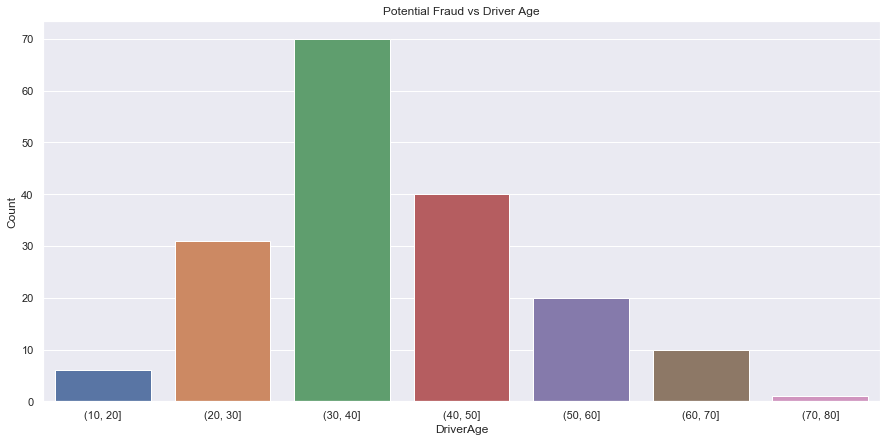

In [84]:
sns.set(style='darkgrid')
Age = HighFraudeRisk[['DriverAge']]
Age['Count'] = 1
AgeCount = Age.groupby(pd.cut(Age['DriverAge'], np.arange(10, 80+10, 10))).sum()
AgeCount = AgeCount.drop(columns=['DriverAge'])

plt.figure(figsize=(15, 7))
sns.barplot(AgeCount.index, AgeCount.Count);
plt.title('Potential Fraud vs Driver Age');

New we can confirm that drivers aged between 30 and 40 are the most drivers tending to commit frauds 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


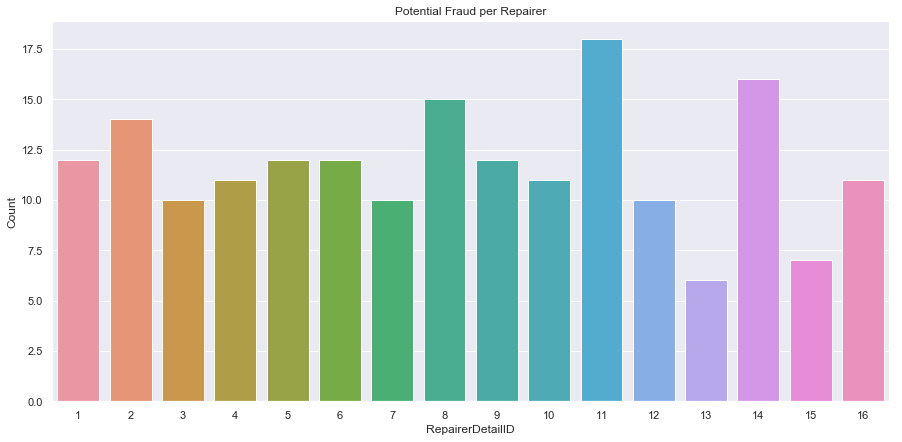

In [85]:
sns.set(style='darkgrid')
Repairer = HighFraudeRisk[['RepairerDetailID']]
Repairer['Count'] = 1
RepairerCount = Repairer.groupby(Repairer.RepairerDetailID).sum()
RepairerCount = RepairerCount.drop(columns=['RepairerDetailID'])

plt.figure(figsize=(15, 7))
sns.barplot(RepairerCount.index, RepairerCount.Count);
plt.title('Potential Fraud per Repairer');

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


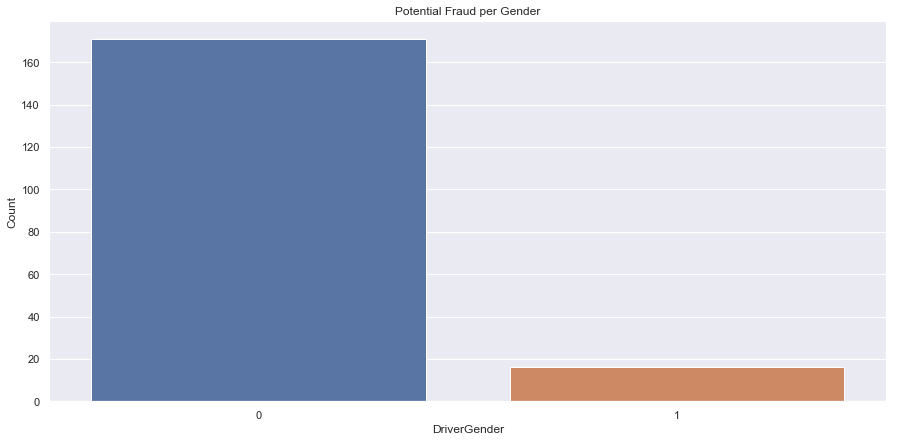

In [86]:
sns.set(style='darkgrid')
Gender = HighFraudeRisk[['DriverGender']]
Gender['Count'] = 1
GenderCount = Gender.groupby(Gender.DriverGender).sum()

plt.figure(figsize=(15, 7))
sns.barplot(GenderCount.index, GenderCount.Count);
plt.title('Potential Fraud per Gender');

Male drivers are much more apt to commit frauds than Female drivers.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


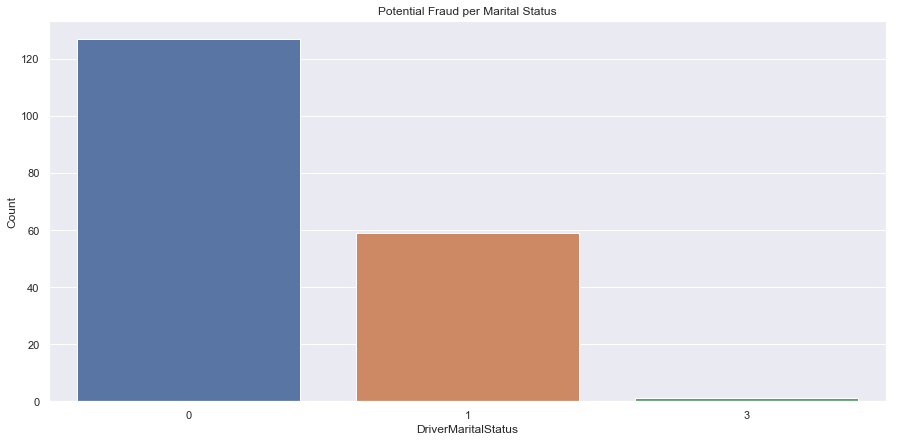

In [87]:
sns.set(style='darkgrid')
Status = HighFraudeRisk[['DriverMaritalStatus']]
Status['Count'] = 1
StatusCount = Status.groupby(Status.DriverMaritalStatus).sum()

plt.figure(figsize=(15, 7))
sns.barplot(StatusCount.index, StatusCount.Count);
plt.title('Potential Fraud per Marital Status');

Fun fact: Married Drivers present more than 60% of the high fraude risk.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


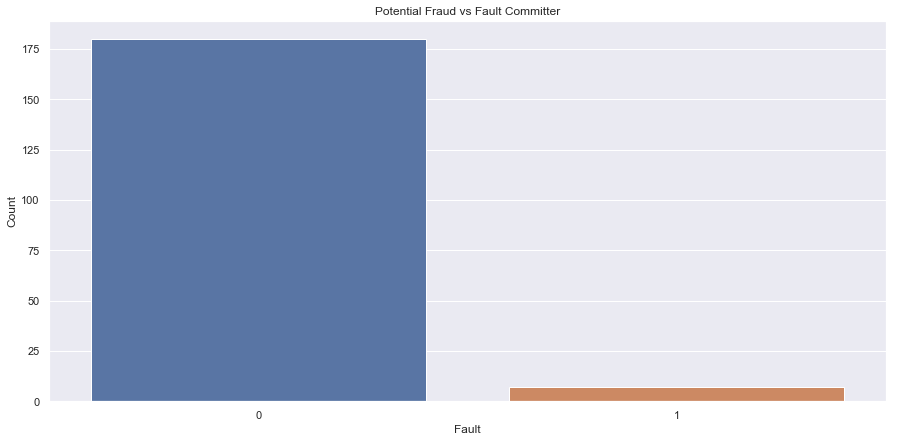

In [88]:
sns.set(style='darkgrid')
Faults = HighFraudeRisk[['Fault']]
Faults['Count'] = 1
FaultsCount = Faults.groupby(Faults.Fault).sum()

plt.figure(figsize=(15, 7))
sns.barplot(FaultsCount.index, FaultsCount.Count);
plt.title('Potential Fraud vs Fault Committer');

The fact that Policy Holders present a high fraud risk is also confirmed.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


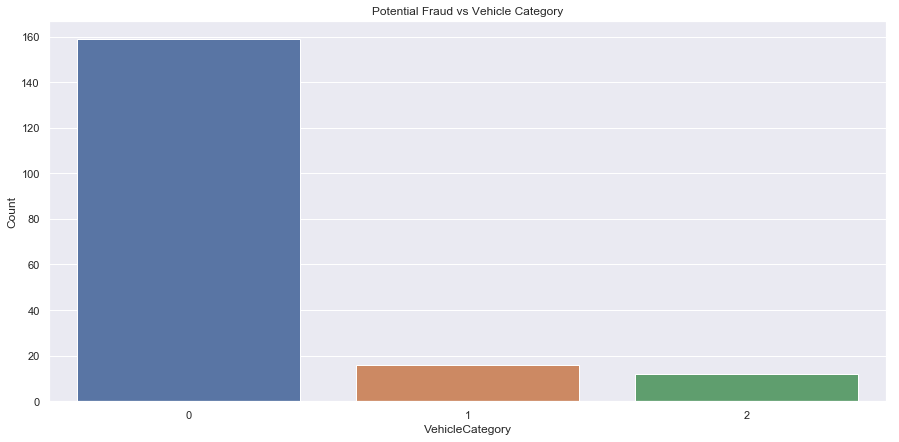

In [89]:
sns.set(style='darkgrid')
category = HighFraudeRisk[['VehicleCategory']]
category['Count'] = 1
categoryCount = category.groupby(category.VehicleCategory).sum()

plt.figure(figsize=(15, 7))
sns.barplot(categoryCount.index, categoryCount.Count);
plt.title('Potential Fraud vs Vehicle Category');

It is clear that Sedan owners are potentilly more likely to commit frauds. And this is also confirmed by the chart below.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


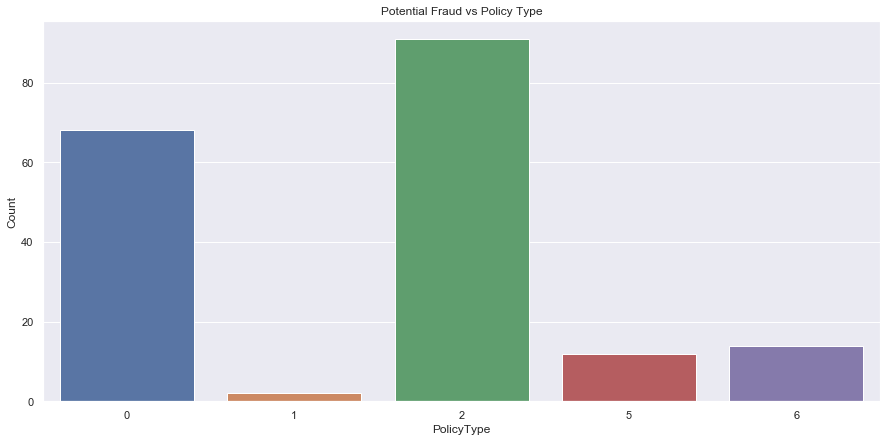

In [90]:
sns.set(style='darkgrid')
ptype = HighFraudeRisk[['PolicyType']]
ptype['Count'] = 1
ptypeCount = ptype.groupby(ptype.PolicyType).sum()

plt.figure(figsize=(15, 7))
sns.barplot(ptypeCount.index, ptypeCount.Count);
plt.title('Potential Fraud vs Policy Type');

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


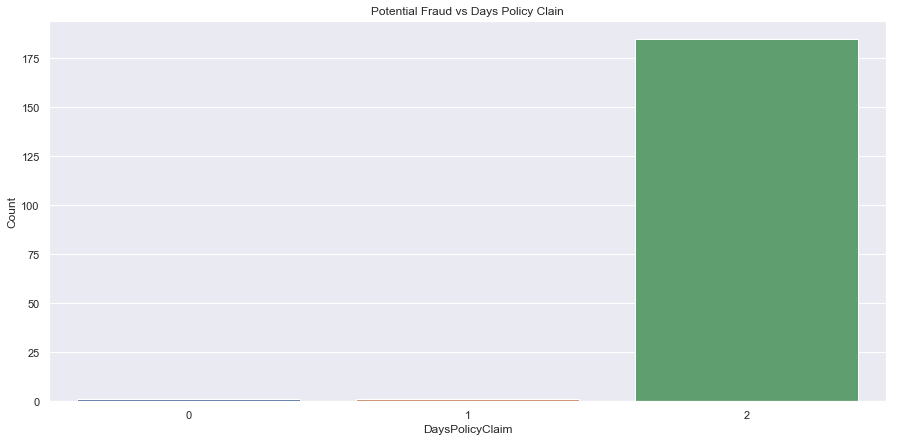

In [91]:
sns.set(style='darkgrid')
days = HighFraudeRisk[['DaysPolicyClaim']]
days['Count'] = 1
daysCount = days.groupby(days.DaysPolicyClaim).sum()

plt.figure(figsize=(15, 7))
sns.barplot(daysCount.index, daysCount.Count);
plt.title('Potential Fraud vs Days Policy Clain');

In almost all high fraud risk cases the policy claim takes more than 30 days. This means that Policy Holders are claiming total loss and the refund is the most valuable. This turns to be the most corrupt behaviour and should be rectified in the future.

Here is some informations concerning Policy Claims taken from this link(https://www.coverbox.co.uk/about/making-a-claim-on-your-car-insurance)<br> <br>
The length of time you can expect to wait before a claim is settled, largely depends on the type of claim you’re making. <br>For example: <br>

**Personal injury claims** – have the potential to take a long time if medical assessments or additional treatment is needed. <br> <br>
**Total loss claim** – this means your car isn't repairable (also known as a write-off). At this point, your insurer will agree a settlement figure with you which is likely to be agreed **within 30 days**, once your insurer has assessed the car and agreed it is a write off. <br> <br>
**Physical damage (to vehicle)** – usually the quickest type of claim depending on the complexity of damage to your car and the availability of your insurer’s preferred body shop. <br>

# Conclusion

In order to put a limit to corruption in car insurance domain we can conclude that the typical profile of Fraud committer is: <br>
- **Days Policy Claim:** More than 30 Days ****** <br>
- **Vehicle Category:** Sedan **** <br>
- **Gender:** Male **** <br>
- **Fault:** Policy Holder *** <br>
- **Marital Status:** Married *** / Single ** <br>
- **Age:** 30-40 ** / 20-30 * / 40-50 * <br>

With this list of caracteristics we have ended the **Profiling Process** and should make decisions based on these criteria.